In [1]:
from defined_functions import *

In [3]:
import sys
sys.version_info


sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)

In [2]:
# Prints functions we can call in our program
print_functions_and_variables('defined_functions.ipynb')

- Function: print_functions_and_variables, Parameters: ['filename']
- Function: obtain_tifs, Parameters: ['in_dir']
- Function: plot_median_intensity_histogram, Parameters: ['directory', 'threshold', 'binsize', 'title']
- Function: segment_binary_cells, Parameters: ['image_input', 'channel', 'threshold']
- Function: segment_dilate_binary_cells, Parameters: ['image_input', 'channel', 'threshold', 'kernel_size', 'num_dilation']
- Function: visualize_segmentation_binary, Parameters: ['image_input', 'channel', 'threshold']
- Function: find_contours, Parameters: ['thresh_img', 'contour_size_limit']
- Function: max_convexity_defect_depth, Parameters: ['contour']
- Function: aspect_ratio, Parameters: ['contour']
- Function: circularity, Parameters: ['contour']
- Function: extract_cell_image, Parameters: ['image', 'contour']
- Function: extract_cells, Parameters: ['image_paths', 'segment_threshold', 'max_depth_threshold', 'min_size', 'out_dir_dapi', 'out_dir_ab']
- Function: extract_maskedbg_c

In [102]:
EMP_imgs = obtain_tifs("data/Prolif_EMP_C4_DAPI_ab60")
WT_imgs = obtain_tifs("data/Prolif_WT_D4_DAPI_ab60")
S42_imgs = obtain_tifs("data/Prolif_S42R_E4_DAPI_ab60")
R80_imgs = obtain_tifs("data/Prolif_R80C_F4_DAPI_ab60")

In [44]:
EMP_imgs = obtain_tifs("data/Prolif_EMP_C5_DAPI_ab71")
WT_imgs = obtain_tifs("data/Prolif_WT_D5_DAPI_ab71")
S42_imgs = obtain_tifs("data/Prolif_S42R_E5_DAPI_ab71")
R80_imgs = obtain_tifs("data/Prolif_R80C_F5_DAPI_ab71")

In [70]:
EMP_imgs = obtain_tifs("data/Prolif_EMP_C6_DAPI_ab72")
WT_imgs = obtain_tifs("data/Prolif_WT_D6_DAPI_ab72")
S42_imgs = obtain_tifs("data/Prolif_S42R_E6_DAPI_ab72")
R80_imgs = obtain_tifs("data/Prolif_R80C_F6_DAPI_ab72")

In [47]:
EMP_imgs = obtain_tifs("data/Prolif_EMP_C7_DAPI_ab110")
WT_imgs = obtain_tifs("data/Prolif_WT_D7_DAPI_ab110")
S42_imgs = obtain_tifs("data/Prolif_S42R_E7_DAPI_ab110")
R80_imgs = obtain_tifs("data/Prolif_R80C_F7_DAPI_ab110")

In [3]:
EMP_imgs = obtain_tifs("data/Prolif_EMP_C10_DAPI_ab259")
WT_imgs = obtain_tifs("data/Prolif_WT_D10_DAPI_ab259")
S42_imgs = obtain_tifs("data/Prolif_S42R_E10_DAPI_ab259")
R80_imgs = obtain_tifs("data/Prolif_R80C_F10_DAPI_ab259")

In [2]:
EMP_imgs = obtain_tifs("data/Sen_EMP_B10_DAPI_ab259")
WT_imgs = obtain_tifs("data/Sen_WT_C10_DAPI_ab259")
S42_imgs = obtain_tifs("data/Sen_S42R_D10_DAPI_ab259")
R80_imgs = obtain_tifs("data/Sen_R80C_E10_DAPI_ab259")

In [59]:
# check image shape and channels
cv.imread(EMP_imgs[0]).shape

(1460, 1920, 3)

In [48]:
def segment_dilate_binary_cells(image_input, channel, threshold, kernel_size, num_dilation):
    
    #select channel of image
    image = image_input[channel, :, :]
    
    # Normalize and scale to 0-255 range
    img_array = (image / image.max()) * 255

    # Convert to uint8
    img_array = img_array.astype(np.uint8)
    
    #segment image
    _, segmented_img = cv2.threshold(img_array, threshold, 255, cv2.THRESH_BINARY)

    # Define a kernel for morphological operations
    kernel = np.ones((kernel_size,kernel_size),np.uint8)

    # Closing operation to fill small holes
    closing = cv2.morphologyEx(segmented_img, cv2.MORPH_CLOSE, kernel)

    # Dilation operation to merge nearby contours
    dilated = cv2.dilate(closing, kernel, iterations = num_dilation)

    return img_array, dilated


In [44]:
def visualize_segmentation_binary(image_input, channel, threshold):
    img_array, segmented_img = segment_binary_cells(image_input, channel, threshold)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_array, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(segmented_img, cmap='gray')
    ax[1].set_title('Binary Segmented Image')
    ax[1].axis('off')
    
    plt.show()
    
    return img_array, segmented_img

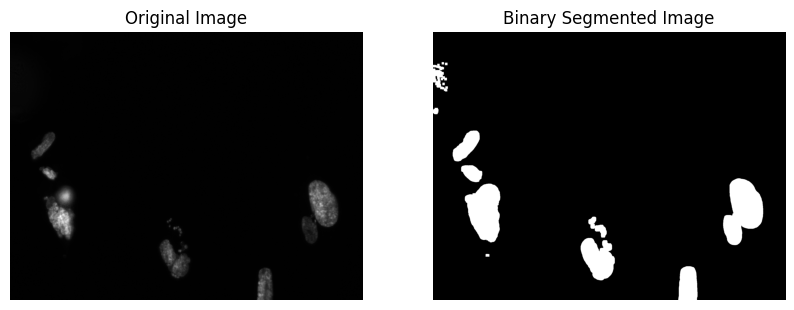

In [62]:
#note DAPI is channel 0 and antibody stain is in channel 1 for this project
#visualize segmented images by binary thresholding 

img_array, segmented_img = visualize_segmentation_binary(imread(EMP_imgs[157]), channel=0, threshold=10)

16631
9227
4253
16503
1491
3317
3 contours called out of 6 contours


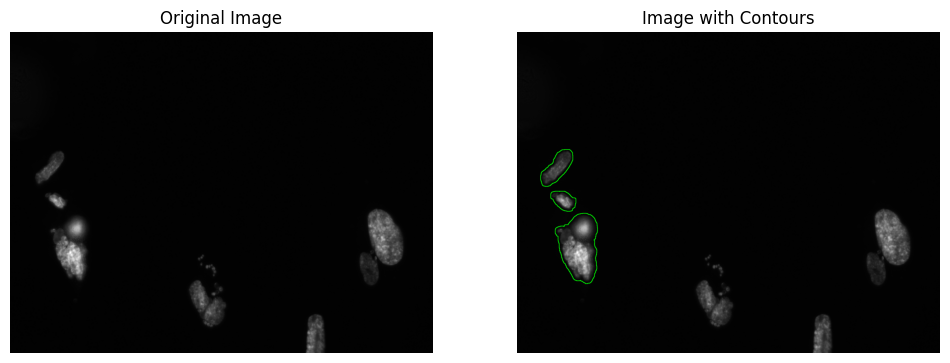

In [63]:
#visualize contours of called single cells after filtering 
filtered_contours = []
max_depth_threshold = 8000
image_with_contours = img_array.copy()
contours = find_contours(segmented_img, contour_size_limit=2000)
for contour in contours:
    max_depth = max_convexity_defect_depth(contour)
    print(max_depth)
    if max_depth < max_depth_threshold:
        filtered_contours.append(contour)
print(len(filtered_contours), 'contours called out of', len(contours), 'contours')

image_with_contours = cv2.cvtColor(image_with_contours, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours,  filtered_contours, -1, (0, 255, 0), 2)


# Display the original image and the image with contours side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
ax2.set_title("Image with Contours")
ax2.axis('off')

plt.show() 

In [11]:
#extracts single cells from the given dir, thresholds can be amended
#extract_cells(WT_imgs, 25, 5000, 1000, 'tt10_data/wt_259_dapi_sen', 'sc_data/wt_259_ab_sen')
extract_maskedbg_cell(image_paths = R80_imgs, segment_threshold = 20, max_depth_threshold = 3000, min_contour_size = 800, out_dir_dapi = 'tt10_data/r80c_259_sen_dapi', out_dir_ab = 'tt10_data/r80c_259_sen_ab')

Convexity error occured, contour is skipped
Convexity error occured, contour is skipped
Convexity error occured, contour is skipped
Convexity error occured, contour is skipped
Finished writing  373  single cell images with BG mask from  424  images
Removed  93  multi cell images


5.7.png


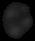

Checkbox(value=False, description='5.7.png')

7.1.png


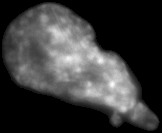

Checkbox(value=False, description='7.1.png')

12.3.png


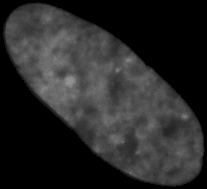

Checkbox(value=False, description='12.3.png')

14.4.png


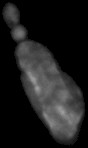

Checkbox(value=False, description='14.4.png')

15.1.png


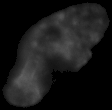

Checkbox(value=False, description='15.1.png')

30.1.png


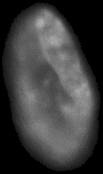

Checkbox(value=False, description='30.1.png')

32.1.png


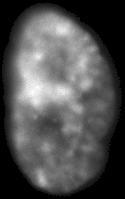

Checkbox(value=False, description='32.1.png')

34.5.png


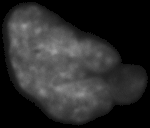

Checkbox(value=False, description='34.5.png')

45.4.png


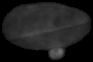

Checkbox(value=False, description='45.4.png')

46.1.png


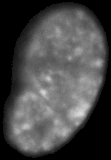

Checkbox(value=False, description='46.1.png')

48.1.png


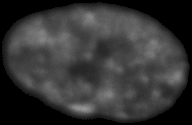

Checkbox(value=False, description='48.1.png')

48.2.png


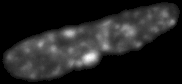

Checkbox(value=False, description='48.2.png')

66.2.png


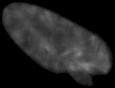

Checkbox(value=False, description='66.2.png')

66.7.png


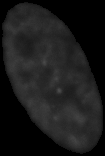

Checkbox(value=False, description='66.7.png')

71.1.png


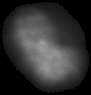

Checkbox(value=False, description='71.1.png')

72.1.png


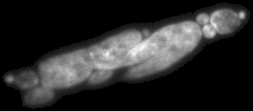

Checkbox(value=False, description='72.1.png')

72.3.png


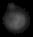

Checkbox(value=False, description='72.3.png')

88.4.png


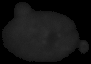

Checkbox(value=False, description='88.4.png')

89.2.png


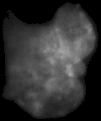

Checkbox(value=False, description='89.2.png')

93.1.png


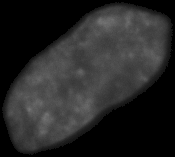

Checkbox(value=False, description='93.1.png')

93.2.png


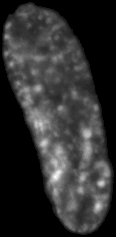

Checkbox(value=False, description='93.2.png')

97.1.png


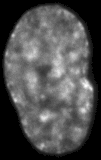

Checkbox(value=False, description='97.1.png')

101.2.png


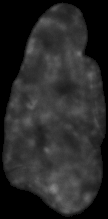

Checkbox(value=False, description='101.2.png')

102.3.png


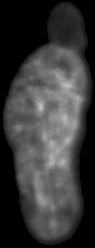

Checkbox(value=False, description='102.3.png')

103.2.png


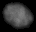

Checkbox(value=False, description='103.2.png')

105.3.png


Checkbox(value=False, description='105.3.png')

107.3.png


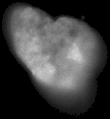

Checkbox(value=False, description='107.3.png')

107.4.png


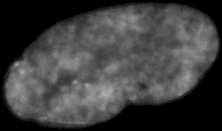

Checkbox(value=False, description='107.4.png')

108.4.png


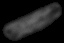

Checkbox(value=False, description='108.4.png')

114.1.png


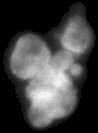

Checkbox(value=False, description='114.1.png')

117.1.png


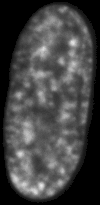

Checkbox(value=False, description='117.1.png')

119.1.png


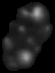

Checkbox(value=False, description='119.1.png')

119.3.png


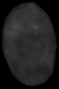

Checkbox(value=False, description='119.3.png')

120.1.png


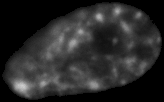

Checkbox(value=False, description='120.1.png')

121.4.png


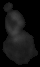

Checkbox(value=False, description='121.4.png')

122.2.png


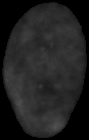

Checkbox(value=False, description='122.2.png')

126.1.png


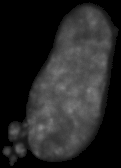

Checkbox(value=False, description='126.1.png')

128.1.png


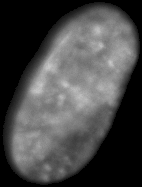

Checkbox(value=False, description='128.1.png')

144.3.png


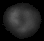

Checkbox(value=False, description='144.3.png')

148.4.png


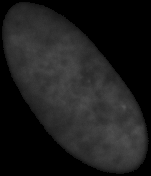

Checkbox(value=False, description='148.4.png')

150.2.png


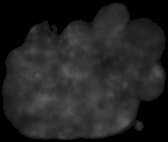

Checkbox(value=False, description='150.2.png')

150.3.png


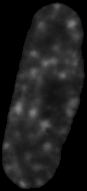

Checkbox(value=False, description='150.3.png')

156.1.png


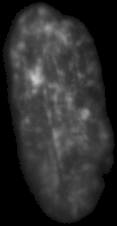

Checkbox(value=False, description='156.1.png')

162.7.png


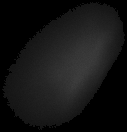

Checkbox(value=False, description='162.7.png')

163.1.png


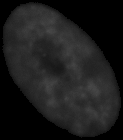

Checkbox(value=False, description='163.1.png')

164.3.png


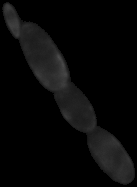

Checkbox(value=False, description='164.3.png')

168.2.png


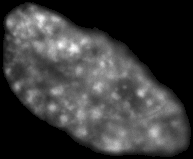

Checkbox(value=False, description='168.2.png')

176.3.png


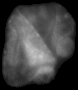

Checkbox(value=False, description='176.3.png')

180.2.png


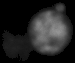

Checkbox(value=False, description='180.2.png')

180.5.png


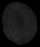

Checkbox(value=False, description='180.5.png')

181.1.png


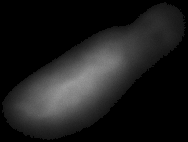

Checkbox(value=False, description='181.1.png')

181.5.png


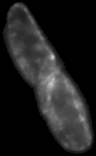

Checkbox(value=False, description='181.5.png')

183.2.png


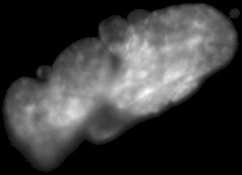

Checkbox(value=False, description='183.2.png')

187.2.png


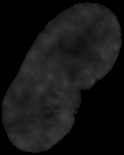

Checkbox(value=False, description='187.2.png')

187.6.png


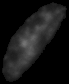

Checkbox(value=False, description='187.6.png')

193.3.png


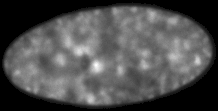

Checkbox(value=False, description='193.3.png')

196.3.png


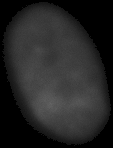

Checkbox(value=False, description='196.3.png')

196.4.png


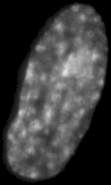

Checkbox(value=False, description='196.4.png')

196.5.png


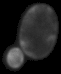

Checkbox(value=False, description='196.5.png')

197.4.png


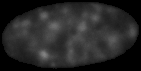

Checkbox(value=False, description='197.4.png')

197.6.png


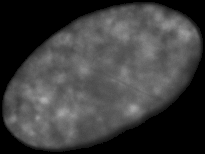

Checkbox(value=False, description='197.6.png')

203.4.png


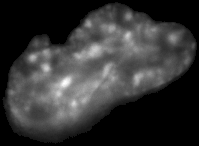

Checkbox(value=False, description='203.4.png')

207.2.png


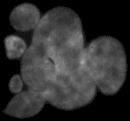

Checkbox(value=False, description='207.2.png')

210.4.png


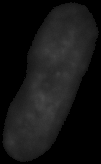

Checkbox(value=False, description='210.4.png')

216.7.png


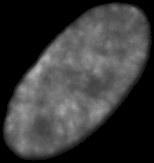

Checkbox(value=False, description='216.7.png')

221.1.png


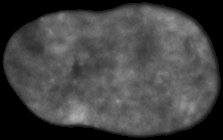

Checkbox(value=False, description='221.1.png')

230.2.png


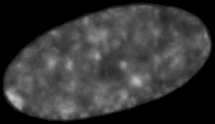

Checkbox(value=False, description='230.2.png')

231.11.png


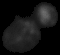

Checkbox(value=False, description='231.11.png')

234.4.png


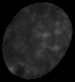

Checkbox(value=False, description='234.4.png')

235.2.png


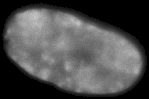

Checkbox(value=False, description='235.2.png')

241.4.png


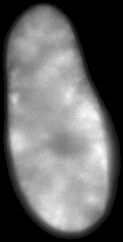

Checkbox(value=False, description='241.4.png')

242.3.png


Checkbox(value=False, description='242.3.png')

247.1.png


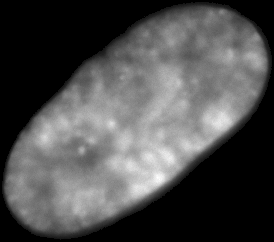

Checkbox(value=False, description='247.1.png')

254.5.png


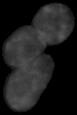

Checkbox(value=False, description='254.5.png')

254.9.png


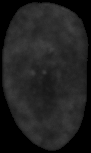

Checkbox(value=False, description='254.9.png')

254.10.png


Checkbox(value=False, description='254.10.png')

255.1.png


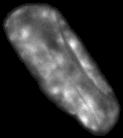

Checkbox(value=False, description='255.1.png')

258.1.png


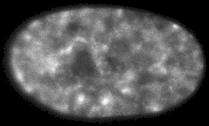

Checkbox(value=False, description='258.1.png')

260.5.png


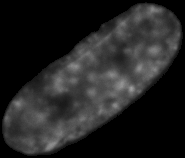

Checkbox(value=False, description='260.5.png')

261.1.png


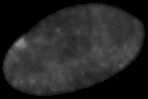

Checkbox(value=False, description='261.1.png')

261.2.png


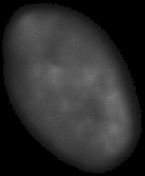

Checkbox(value=False, description='261.2.png')

261.5.png


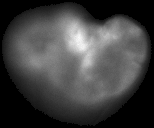

Checkbox(value=False, description='261.5.png')

264.1.png


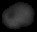

Checkbox(value=False, description='264.1.png')

265.1.png


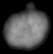

Checkbox(value=False, description='265.1.png')

266.1.png


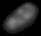

Checkbox(value=False, description='266.1.png')

266.2.png


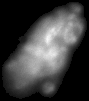

Checkbox(value=False, description='266.2.png')

266.6.png


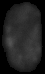

Checkbox(value=False, description='266.6.png')

268.1.png


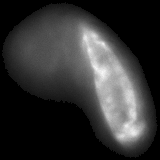

Checkbox(value=False, description='268.1.png')

273.1.png


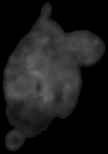

Checkbox(value=False, description='273.1.png')

274.6.png


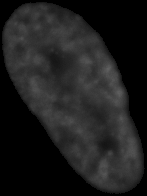

Checkbox(value=False, description='274.6.png')

275.5.png


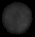

Checkbox(value=False, description='275.5.png')

275.6.png


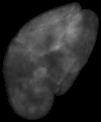

Checkbox(value=False, description='275.6.png')

279.5.png


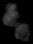

Checkbox(value=False, description='279.5.png')

290.3.png


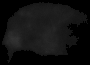

Checkbox(value=False, description='290.3.png')

295.1.png


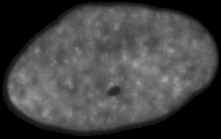

Checkbox(value=False, description='295.1.png')

307.2.png


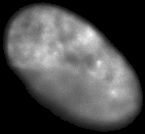

Checkbox(value=False, description='307.2.png')

307.3.png


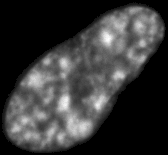

Checkbox(value=False, description='307.3.png')

308.2.png


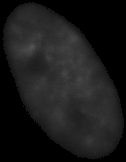

Checkbox(value=False, description='308.2.png')

316.1.png


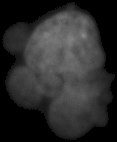

Checkbox(value=False, description='316.1.png')

321.3.png


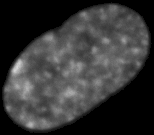

Checkbox(value=False, description='321.3.png')

324.2.png


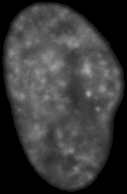

Checkbox(value=False, description='324.2.png')

329.2.png


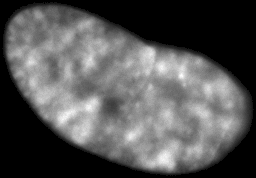

Checkbox(value=False, description='329.2.png')

330.6.png


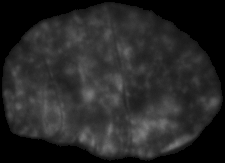

Checkbox(value=False, description='330.6.png')

337.4.png


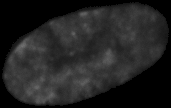

Checkbox(value=False, description='337.4.png')

339.8.png


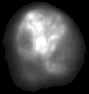

Checkbox(value=False, description='339.8.png')

347.2.png


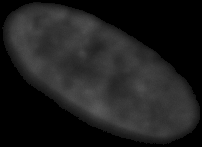

Checkbox(value=False, description='347.2.png')

347.3.png


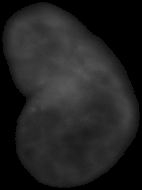

Checkbox(value=False, description='347.3.png')

356.1.png


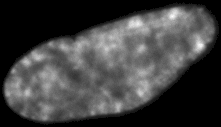

Checkbox(value=False, description='356.1.png')

366.1.png


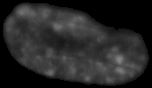

Checkbox(value=False, description='366.1.png')

387.2.png


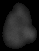

Checkbox(value=False, description='387.2.png')

393.1.png


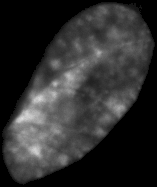

Checkbox(value=False, description='393.1.png')

395.4.png


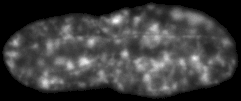

Checkbox(value=False, description='395.4.png')

401.3.png


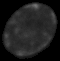

Checkbox(value=False, description='401.3.png')

403.1.png


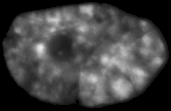

Checkbox(value=False, description='403.1.png')

405.2.png


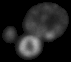

Checkbox(value=False, description='405.2.png')

407.3.png


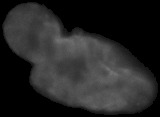

Checkbox(value=False, description='407.3.png')

415.3.png


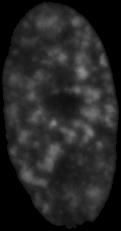

Checkbox(value=False, description='415.3.png')

416.2.png


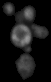

Checkbox(value=False, description='416.2.png')

417.1.png


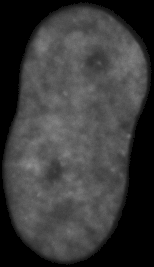

Checkbox(value=False, description='417.1.png')

422.8.png


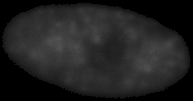

Checkbox(value=False, description='422.8.png')

5.4.png


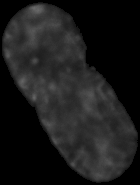

Checkbox(value=False, description='5.4.png')

6.1.png


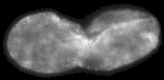

Checkbox(value=False, description='6.1.png')

14.2.png


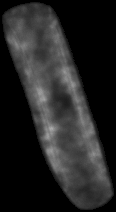

Checkbox(value=False, description='14.2.png')

59.1.png


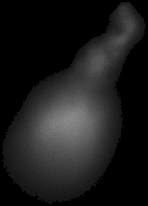

Checkbox(value=False, description='59.1.png')

104.1.png


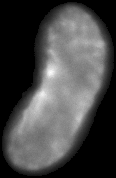

Checkbox(value=False, description='104.1.png')

72.2.png


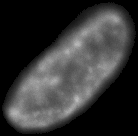

Checkbox(value=False, description='72.2.png')

29.5.png


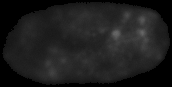

Checkbox(value=False, description='29.5.png')

49.1.png


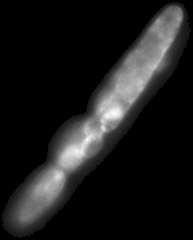

Checkbox(value=False, description='49.1.png')

20.3.png


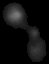

Checkbox(value=False, description='20.3.png')

55.4.png


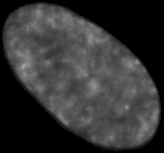

Checkbox(value=False, description='55.4.png')

94.2.png


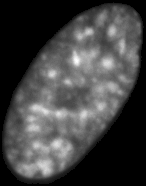

Checkbox(value=False, description='94.2.png')

106.1.png


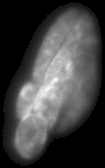

Checkbox(value=False, description='106.1.png')

45.2.png


Checkbox(value=False, description='45.2.png')

3.3.png


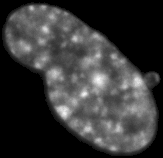

Checkbox(value=False, description='3.3.png')

88.5.png


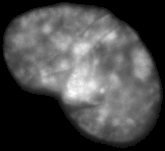

Checkbox(value=False, description='88.5.png')

117.4.png


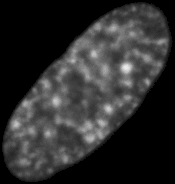

Checkbox(value=False, description='117.4.png')

23.3.png


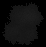

Checkbox(value=False, description='23.3.png')

23.4.png


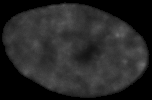

Checkbox(value=False, description='23.4.png')

108.1.png


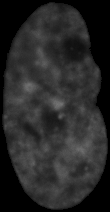

Checkbox(value=False, description='108.1.png')

102.2.png


Checkbox(value=False, description='102.2.png')

105.2.png


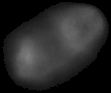

Checkbox(value=False, description='105.2.png')

110.3.png


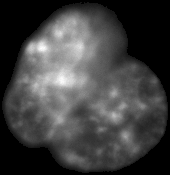

Checkbox(value=False, description='110.3.png')

24.1.png


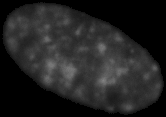

Checkbox(value=False, description='24.1.png')

83.2.png


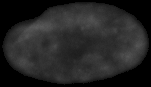

Checkbox(value=False, description='83.2.png')

66.3.png


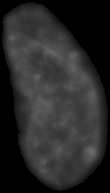

Checkbox(value=False, description='66.3.png')

115.1.png


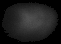

Checkbox(value=False, description='115.1.png')

95.2.png


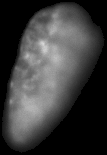

Checkbox(value=False, description='95.2.png')

98.3.png


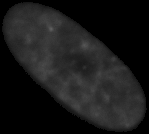

Checkbox(value=False, description='98.3.png')

56.1.png


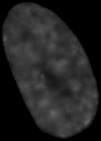

Checkbox(value=False, description='56.1.png')

56.3.png


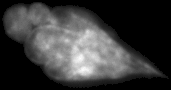

Checkbox(value=False, description='56.3.png')

56.2.png


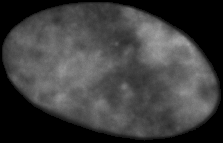

Checkbox(value=False, description='56.2.png')

65.1.png


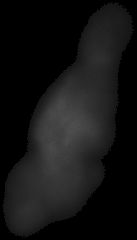

Checkbox(value=False, description='65.1.png')

80.4.png


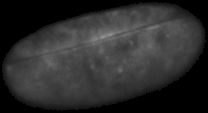

Checkbox(value=False, description='80.4.png')

101.1.png


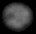

Checkbox(value=False, description='101.1.png')

98.5.png


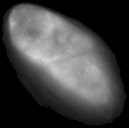

Checkbox(value=False, description='98.5.png')

33.1.png


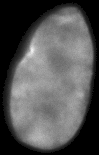

Checkbox(value=False, description='33.1.png')

89.1.png


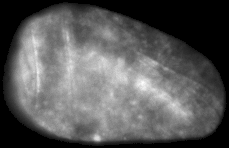

Checkbox(value=False, description='89.1.png')

14.5.png


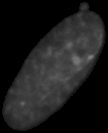

Checkbox(value=False, description='14.5.png')

121.1.png


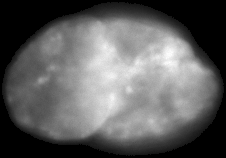

Checkbox(value=False, description='121.1.png')

129.2.png


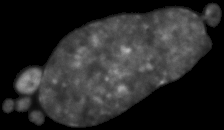

Checkbox(value=False, description='129.2.png')

137.2.png


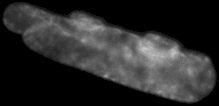

Checkbox(value=False, description='137.2.png')

140.2.png


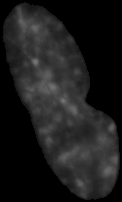

Checkbox(value=False, description='140.2.png')

142.5.png


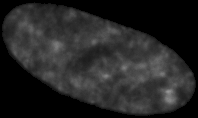

Checkbox(value=False, description='142.5.png')

145.2.png


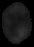

Checkbox(value=False, description='145.2.png')

153.1.png


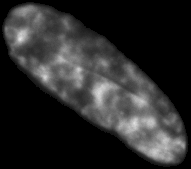

Checkbox(value=False, description='153.1.png')

154.1.png


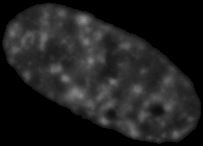

Checkbox(value=False, description='154.1.png')

159.1.png


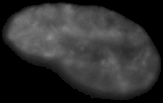

Checkbox(value=False, description='159.1.png')

163.2.png


Checkbox(value=False, description='163.2.png')

163.6.png


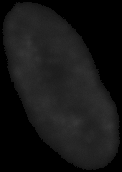

Checkbox(value=False, description='163.6.png')

164.2.png


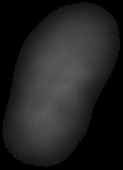

Checkbox(value=False, description='164.2.png')

176.1.png


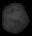

Checkbox(value=False, description='176.1.png')

176.8.png


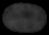

Checkbox(value=False, description='176.8.png')

178.3.png


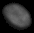

Checkbox(value=False, description='178.3.png')

181.2.png


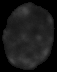

Checkbox(value=False, description='181.2.png')

181.3.png


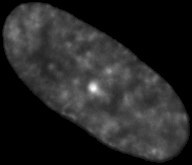

Checkbox(value=False, description='181.3.png')

183.1.png


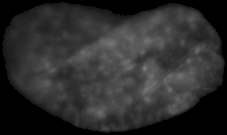

Checkbox(value=False, description='183.1.png')

183.3.png


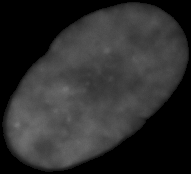

Checkbox(value=False, description='183.3.png')

187.1.png


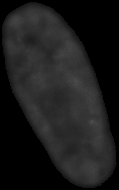

Checkbox(value=False, description='187.1.png')

187.5.png


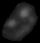

Checkbox(value=False, description='187.5.png')

187.8.png


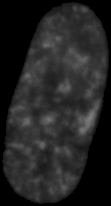

Checkbox(value=False, description='187.8.png')

195.1.png


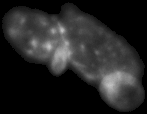

Checkbox(value=False, description='195.1.png')

196.2.png


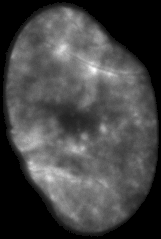

Checkbox(value=False, description='196.2.png')

196.6.png


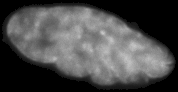

Checkbox(value=False, description='196.6.png')

197.3.png


Checkbox(value=False, description='197.3.png')

198.1.png


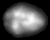

Checkbox(value=False, description='198.1.png')

204.1.png


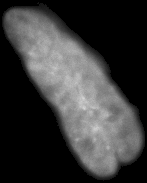

Checkbox(value=False, description='204.1.png')

210.3.png


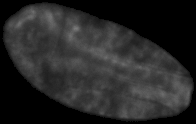

Checkbox(value=False, description='210.3.png')

213.1.png


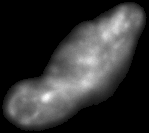

Checkbox(value=False, description='213.1.png')

213.6.png


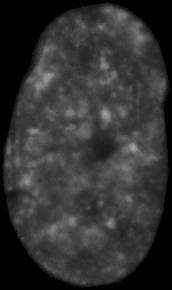

Checkbox(value=False, description='213.6.png')

216.2.png


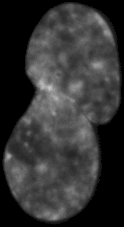

Checkbox(value=False, description='216.2.png')

222.3.png


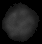

Checkbox(value=False, description='222.3.png')

223.2.png


Checkbox(value=False, description='223.2.png')

230.3.png


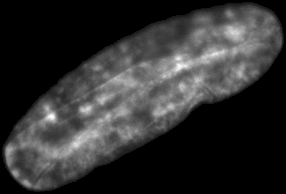

Checkbox(value=False, description='230.3.png')

231.2.png


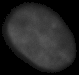

Checkbox(value=False, description='231.2.png')

231.3.png


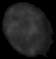

Checkbox(value=False, description='231.3.png')

236.3.png


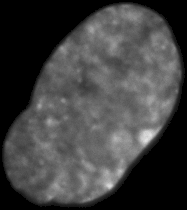

Checkbox(value=False, description='236.3.png')

242.2.png


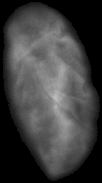

Checkbox(value=False, description='242.2.png')

248.2.png


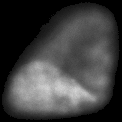

Checkbox(value=False, description='248.2.png')

257.1.png


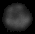

Checkbox(value=False, description='257.1.png')

260.6.png


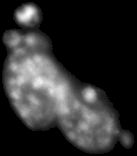

Checkbox(value=False, description='260.6.png')

261.4.png


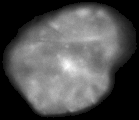

Checkbox(value=False, description='261.4.png')

263.3.png


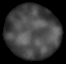

Checkbox(value=False, description='263.3.png')

265.3.png


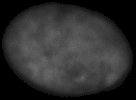

Checkbox(value=False, description='265.3.png')

273.6.png


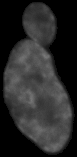

Checkbox(value=False, description='273.6.png')

275.7.png


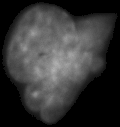

Checkbox(value=False, description='275.7.png')

277.3.png


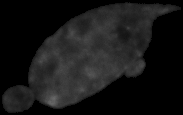

Checkbox(value=False, description='277.3.png')

277.5.png


Checkbox(value=False, description='277.5.png')

277.9.png


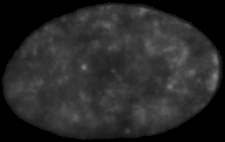

Checkbox(value=False, description='277.9.png')

281.1.png


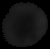

Checkbox(value=False, description='281.1.png')

282.2.png


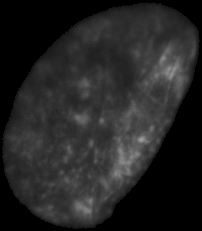

Checkbox(value=False, description='282.2.png')

283.2.png


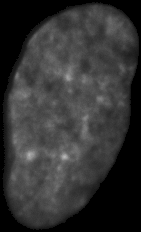

Checkbox(value=False, description='283.2.png')

289.3.png


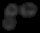

Checkbox(value=False, description='289.3.png')

291.1.png


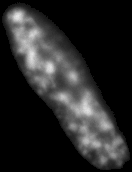

Checkbox(value=False, description='291.1.png')

294.1.png


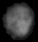

Checkbox(value=False, description='294.1.png')

302.5.png


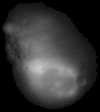

Checkbox(value=False, description='302.5.png')

306.3.png


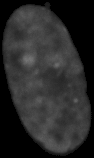

Checkbox(value=False, description='306.3.png')

312.7.png


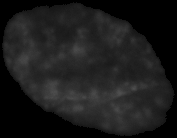

Checkbox(value=False, description='312.7.png')

324.3.png


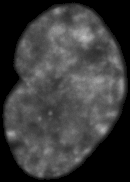

Checkbox(value=False, description='324.3.png')

328.2.png


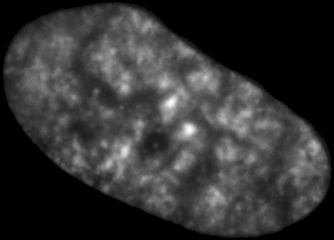

Checkbox(value=False, description='328.2.png')

330.5.png


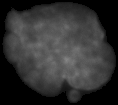

Checkbox(value=False, description='330.5.png')

330.7.png


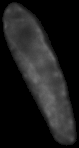

Checkbox(value=False, description='330.7.png')

339.6.png


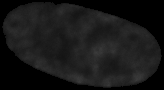

Checkbox(value=False, description='339.6.png')

340.2.png


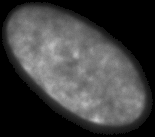

Checkbox(value=False, description='340.2.png')

345.1.png


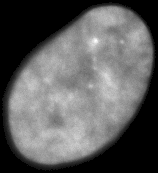

Checkbox(value=False, description='345.1.png')

350.2.png


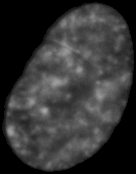

Checkbox(value=False, description='350.2.png')

352.2.png


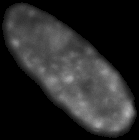

Checkbox(value=False, description='352.2.png')

352.4.png


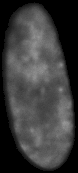

Checkbox(value=False, description='352.4.png')

361.1.png


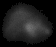

Checkbox(value=False, description='361.1.png')

362.2.png


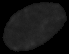

Checkbox(value=False, description='362.2.png')

366.2.png


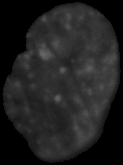

Checkbox(value=False, description='366.2.png')

366.3.png


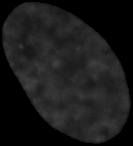

Checkbox(value=False, description='366.3.png')

372.1.png


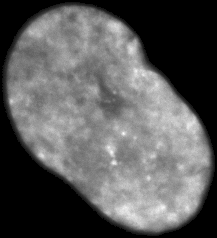

Checkbox(value=False, description='372.1.png')

381.3.png


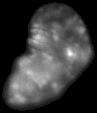

Checkbox(value=False, description='381.3.png')

383.2.png


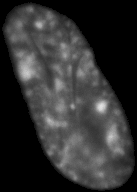

Checkbox(value=False, description='383.2.png')

384.1.png


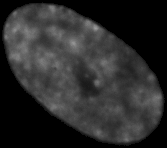

Checkbox(value=False, description='384.1.png')

384.3.png


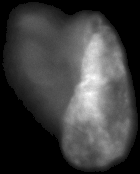

Checkbox(value=False, description='384.3.png')

391.1.png


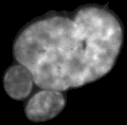

Checkbox(value=False, description='391.1.png')

395.2.png


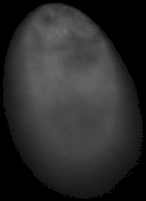

Checkbox(value=False, description='395.2.png')

399.1.png


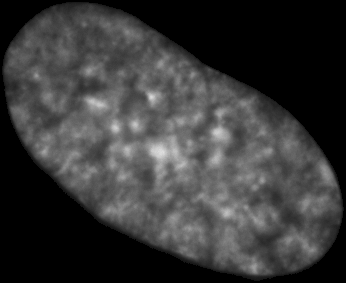

Checkbox(value=False, description='399.1.png')

401.1.png


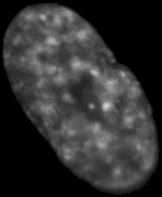

Checkbox(value=False, description='401.1.png')

416.5.png


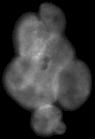

Checkbox(value=False, description='416.5.png')

420.3.png


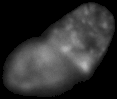

Checkbox(value=False, description='420.3.png')

34.4.png


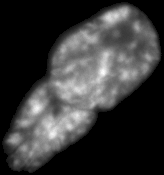

Checkbox(value=False, description='34.4.png')

68.4.png


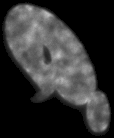

Checkbox(value=False, description='68.4.png')

151.1.png


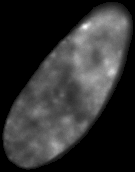

Checkbox(value=False, description='151.1.png')

153.2.png


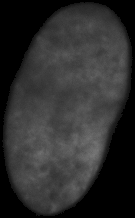

Checkbox(value=False, description='153.2.png')

23.1.png


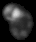

Checkbox(value=False, description='23.1.png')

66.6.png


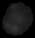

Checkbox(value=False, description='66.6.png')

61.4.png


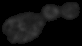

Checkbox(value=False, description='61.4.png')

171.1.png


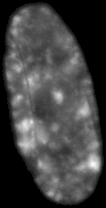

Checkbox(value=False, description='171.1.png')

5.6.png


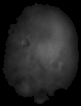

Checkbox(value=False, description='5.6.png')

194.1.png


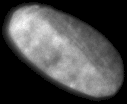

Checkbox(value=False, description='194.1.png')

148.1.png


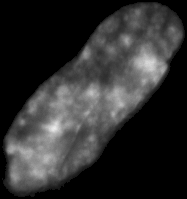

Checkbox(value=False, description='148.1.png')

15.4.png


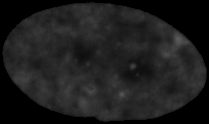

Checkbox(value=False, description='15.4.png')

199.1.png


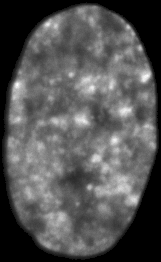

Checkbox(value=False, description='199.1.png')

12.5.png


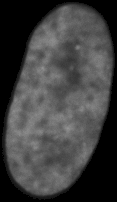

Checkbox(value=False, description='12.5.png')

172.2.png


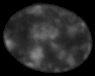

Checkbox(value=False, description='172.2.png')

176.9.png


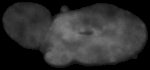

Checkbox(value=False, description='176.9.png')

107.1.png


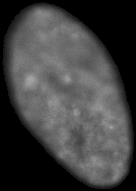

Checkbox(value=False, description='107.1.png')

161.2.png


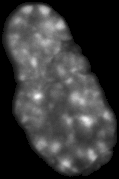

Checkbox(value=False, description='161.2.png')

104.2.png


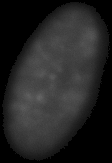

Checkbox(value=False, description='104.2.png')

110.4.png


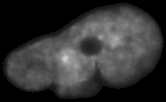

Checkbox(value=False, description='110.4.png')

5.1.png


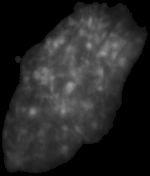

Checkbox(value=False, description='5.1.png')

188.1.png


Checkbox(value=False, description='188.1.png')

13.1.png


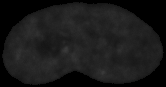

Checkbox(value=False, description='13.1.png')

162.1.png


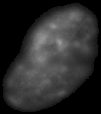

Checkbox(value=False, description='162.1.png')

98.6.png


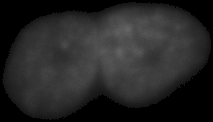

Checkbox(value=False, description='98.6.png')

20.1.png


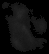

Checkbox(value=False, description='20.1.png')

28.1.png


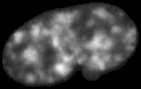

Checkbox(value=False, description='28.1.png')

158.1.png


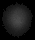

Checkbox(value=False, description='158.1.png')

185.4.png


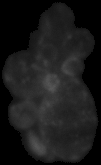

Checkbox(value=False, description='185.4.png')

185.2.png


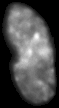

Checkbox(value=False, description='185.2.png')

153.3.png


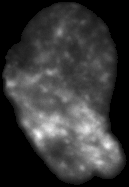

Checkbox(value=False, description='153.3.png')

66.1.png


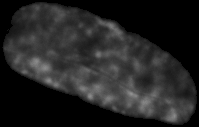

Checkbox(value=False, description='66.1.png')

140.3.png


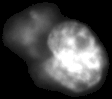

Checkbox(value=False, description='140.3.png')

143.1.png


Checkbox(value=False, description='143.1.png')

161.1.png


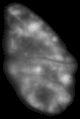

Checkbox(value=False, description='161.1.png')

12.2.png


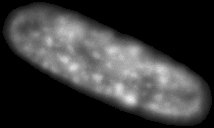

Checkbox(value=False, description='12.2.png')

65.2.png


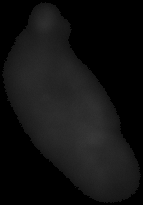

Checkbox(value=False, description='65.2.png')

101.4.png


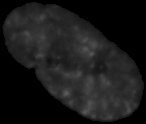

Checkbox(value=False, description='101.4.png')

20.2.png


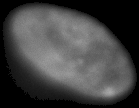

Checkbox(value=False, description='20.2.png')

111.1.png


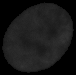

Checkbox(value=False, description='111.1.png')

195.2.png


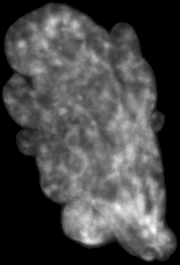

Checkbox(value=False, description='195.2.png')

159.4.png


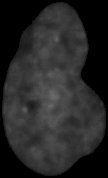

Checkbox(value=False, description='159.4.png')

184.2.png


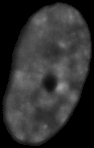

Checkbox(value=False, description='184.2.png')

80.3.png


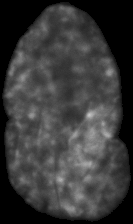

Checkbox(value=False, description='80.3.png')

101.5.png


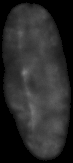

Checkbox(value=False, description='101.5.png')

72.6.png


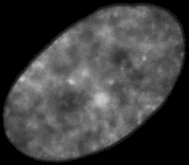

Checkbox(value=False, description='72.6.png')

23.2.png


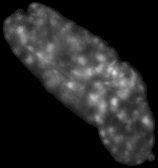

Checkbox(value=False, description='23.2.png')

105.4.png


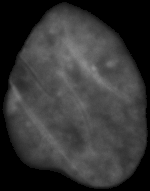

Checkbox(value=False, description='105.4.png')

198.3.png


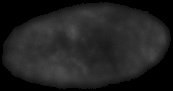

Checkbox(value=False, description='198.3.png')

95.1.png


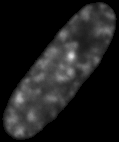

Checkbox(value=False, description='95.1.png')

193.6.png


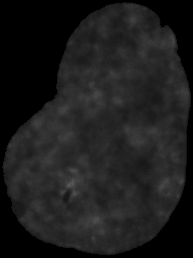

Checkbox(value=False, description='193.6.png')

103.4.png


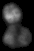

Checkbox(value=False, description='103.4.png')

96.2.png


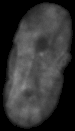

Checkbox(value=False, description='96.2.png')

99.1.png


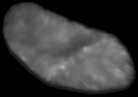

Checkbox(value=False, description='99.1.png')

149.2.png


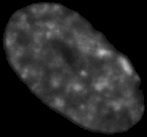

Checkbox(value=False, description='149.2.png')

146.1.png


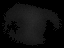

Checkbox(value=False, description='146.1.png')

48.3.png


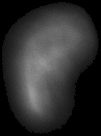

Checkbox(value=False, description='48.3.png')

15.3.png


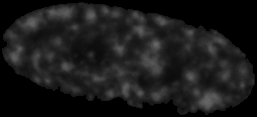

Checkbox(value=False, description='15.3.png')

124.1.png


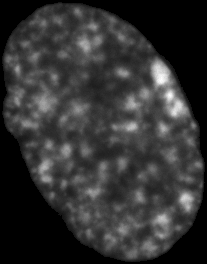

Checkbox(value=False, description='124.1.png')

152.1.png


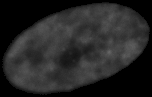

Checkbox(value=False, description='152.1.png')

47.3.png


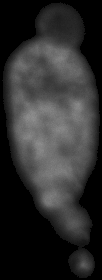

Checkbox(value=False, description='47.3.png')

163.4.png


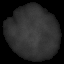

Checkbox(value=False, description='163.4.png')

210.5.png


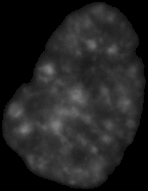

Checkbox(value=False, description='210.5.png')

213.3.png


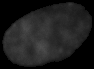

Checkbox(value=False, description='213.3.png')

214.4.png


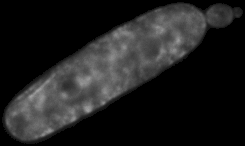

Checkbox(value=False, description='214.4.png')

216.6.png


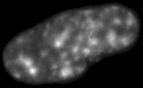

Checkbox(value=False, description='216.6.png')

224.1.png


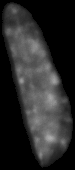

Checkbox(value=False, description='224.1.png')

231.6.png


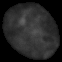

Checkbox(value=False, description='231.6.png')

234.3.png


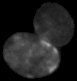

Checkbox(value=False, description='234.3.png')

236.1.png


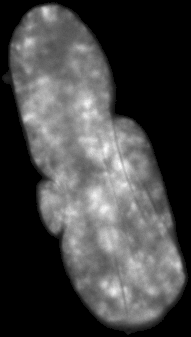

Checkbox(value=False, description='236.1.png')

240.1.png


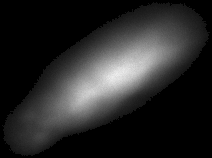

Checkbox(value=False, description='240.1.png')

240.2.png


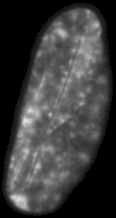

Checkbox(value=False, description='240.2.png')

240.3.png


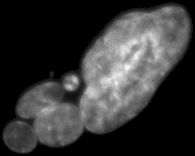

Checkbox(value=False, description='240.3.png')

245.1.png


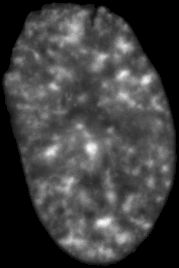

Checkbox(value=False, description='245.1.png')

251.1.png


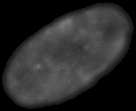

Checkbox(value=False, description='251.1.png')

254.1.png


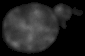

Checkbox(value=False, description='254.1.png')

257.4.png


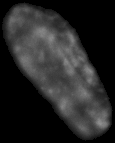

Checkbox(value=False, description='257.4.png')

260.1.png


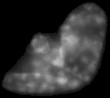

Checkbox(value=False, description='260.1.png')

260.4.png


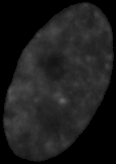

Checkbox(value=False, description='260.4.png')

266.4.png


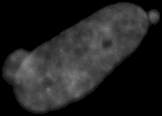

Checkbox(value=False, description='266.4.png')

268.2.png


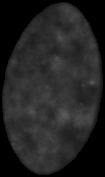

Checkbox(value=False, description='268.2.png')

273.2.png


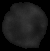

Checkbox(value=False, description='273.2.png')

273.8.png


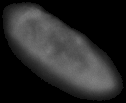

Checkbox(value=False, description='273.8.png')

275.1.png


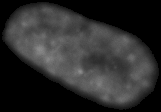

Checkbox(value=False, description='275.1.png')

275.4.png


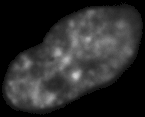

Checkbox(value=False, description='275.4.png')

278.1.png


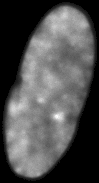

Checkbox(value=False, description='278.1.png')

285.1.png


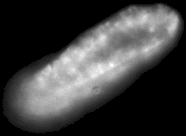

Checkbox(value=False, description='285.1.png')

289.1.png


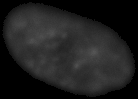

Checkbox(value=False, description='289.1.png')

289.4.png


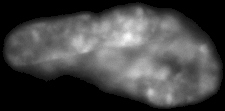

Checkbox(value=False, description='289.4.png')

291.2.png


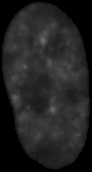

Checkbox(value=False, description='291.2.png')

291.3.png


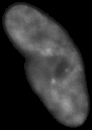

Checkbox(value=False, description='291.3.png')

291.4.png


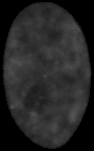

Checkbox(value=False, description='291.4.png')

296.2.png


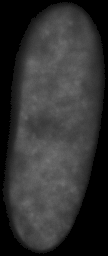

Checkbox(value=False, description='296.2.png')

302.2.png


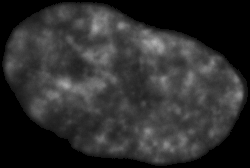

Checkbox(value=False, description='302.2.png')

312.4.png


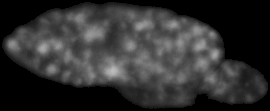

Checkbox(value=False, description='312.4.png')

313.1.png


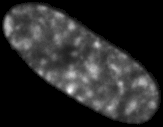

Checkbox(value=False, description='313.1.png')

316.2.png


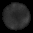

Checkbox(value=False, description='316.2.png')

320.4.png


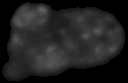

Checkbox(value=False, description='320.4.png')

322.4.png


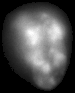

Checkbox(value=False, description='322.4.png')

328.4.png


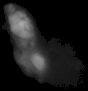

Checkbox(value=False, description='328.4.png')

339.5.png


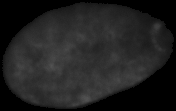

Checkbox(value=False, description='339.5.png')

339.9.png


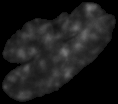

Checkbox(value=False, description='339.9.png')

347.4.png


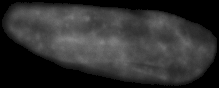

Checkbox(value=False, description='347.4.png')

348.1.png


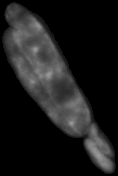

Checkbox(value=False, description='348.1.png')

352.3.png


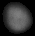

Checkbox(value=False, description='352.3.png')

355.3.png


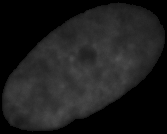

Checkbox(value=False, description='355.3.png')

357.1.png


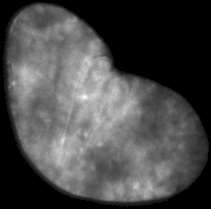

Checkbox(value=False, description='357.1.png')

358.3.png


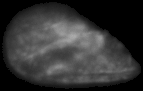

Checkbox(value=False, description='358.3.png')

360.2.png


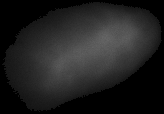

Checkbox(value=False, description='360.2.png')

370.7.png


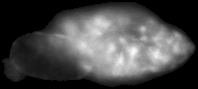

Checkbox(value=False, description='370.7.png')

371.1.png


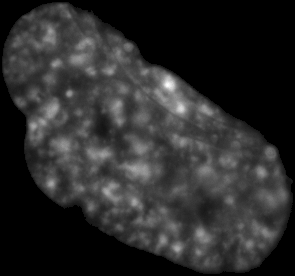

Checkbox(value=False, description='371.1.png')

375.1.png


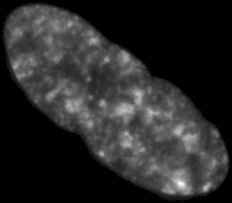

Checkbox(value=False, description='375.1.png')

386.2.png


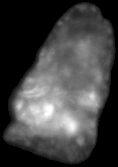

Checkbox(value=False, description='386.2.png')

391.2.png


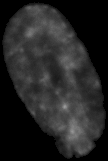

Checkbox(value=False, description='391.2.png')

392.2.png


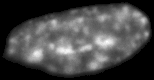

Checkbox(value=False, description='392.2.png')

392.3.png


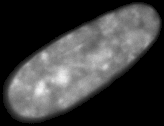

Checkbox(value=False, description='392.3.png')

393.2.png


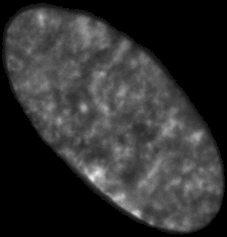

Checkbox(value=False, description='393.2.png')

394.2.png


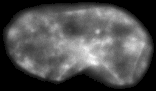

Checkbox(value=False, description='394.2.png')

395.3.png


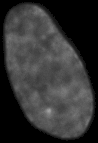

Checkbox(value=False, description='395.3.png')

396.1.png


Checkbox(value=False, description='396.1.png')

398.3.png


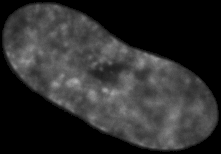

Checkbox(value=False, description='398.3.png')

400.1.png


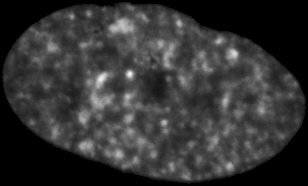

Checkbox(value=False, description='400.1.png')

400.2.png


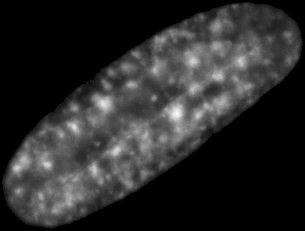

Checkbox(value=False, description='400.2.png')

409.1.png


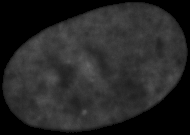

Checkbox(value=False, description='409.1.png')

416.3.png


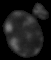

Checkbox(value=False, description='416.3.png')

417.2.png


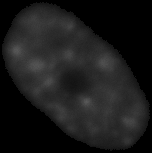

Checkbox(value=False, description='417.2.png')

418.2.png


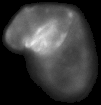

Checkbox(value=False, description='418.2.png')

420.2.png


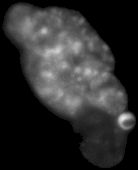

Checkbox(value=False, description='420.2.png')

420.4.png


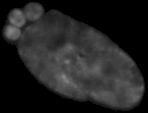

Checkbox(value=False, description='420.4.png')

420.5.png


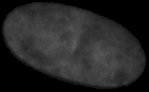

Checkbox(value=False, description='420.5.png')

420.7.png


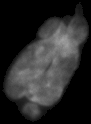

Checkbox(value=False, description='420.7.png')

422.1.png


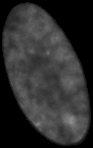

Checkbox(value=False, description='422.1.png')

422.2.png


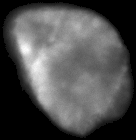

Checkbox(value=False, description='422.2.png')

422.7.png


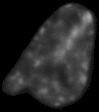

Checkbox(value=False, description='422.7.png')

63.1.png


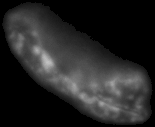

Checkbox(value=False, description='63.1.png')

11.4.png


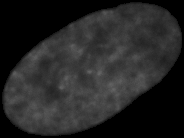

Checkbox(value=False, description='11.4.png')

159.7.png


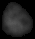

Checkbox(value=False, description='159.7.png')

95.3.png


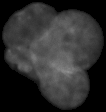

Checkbox(value=False, description='95.3.png')

68.1.png


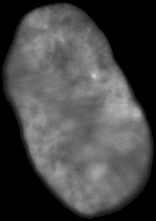

Checkbox(value=False, description='68.1.png')

128.5.png


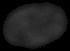

Checkbox(value=False, description='128.5.png')

164.1.png


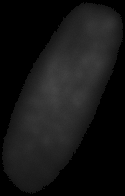

Checkbox(value=False, description='164.1.png')

140.5.png


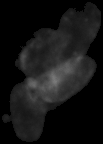

Checkbox(value=False, description='140.5.png')

178.5.png


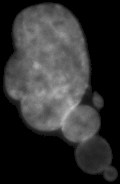

Checkbox(value=False, description='178.5.png')

192.1.png


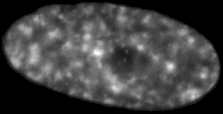

Checkbox(value=False, description='192.1.png')

47.6.png


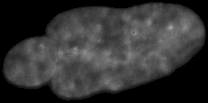

Checkbox(value=False, description='47.6.png')

88.1.png


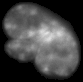

Checkbox(value=False, description='88.1.png')

66.9.png


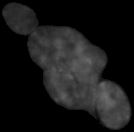

Checkbox(value=False, description='66.9.png')

83.1.png


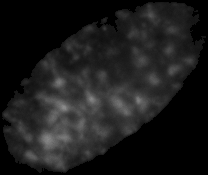

Checkbox(value=False, description='83.1.png')

55.2.png


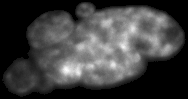

Checkbox(value=False, description='55.2.png')

140.4.png


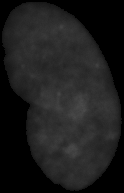

Checkbox(value=False, description='140.4.png')

154.7.png


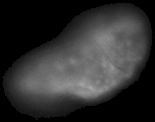

Checkbox(value=False, description='154.7.png')

54.2.png


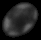

Checkbox(value=False, description='54.2.png')

106.2.png


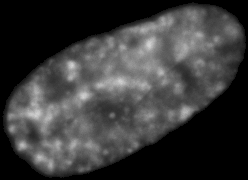

Checkbox(value=False, description='106.2.png')

91.1.png


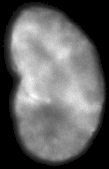

Checkbox(value=False, description='91.1.png')

185.3.png


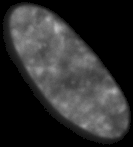

Checkbox(value=False, description='185.3.png')

184.5.png


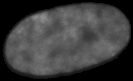

Checkbox(value=False, description='184.5.png')

128.6.png


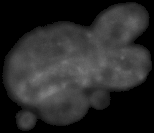

Checkbox(value=False, description='128.6.png')

29.4.png


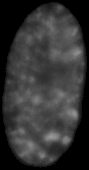

Checkbox(value=False, description='29.4.png')

197.1.png


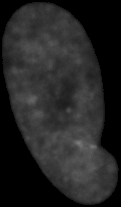

Checkbox(value=False, description='197.1.png')

48.4.png


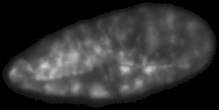

Checkbox(value=False, description='48.4.png')

187.3.png


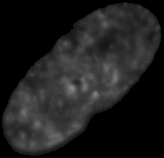

Checkbox(value=False, description='187.3.png')

180.8.png


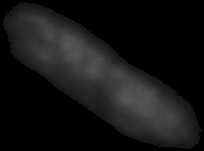

Checkbox(value=False, description='180.8.png')

163.7.png


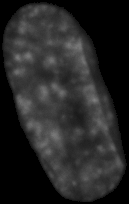

Checkbox(value=False, description='163.7.png')

68.3.png


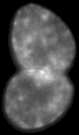

Checkbox(value=False, description='68.3.png')

68.2.png


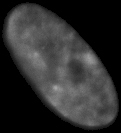

Checkbox(value=False, description='68.2.png')

61.3.png


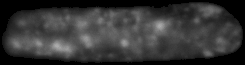

Checkbox(value=False, description='61.3.png')

27.1.png


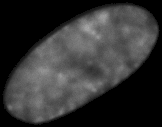

Checkbox(value=False, description='27.1.png')

149.1.png


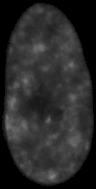

Checkbox(value=False, description='149.1.png')

105.1.png


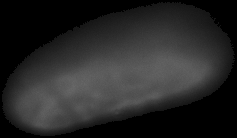

Checkbox(value=False, description='105.1.png')

162.6.png


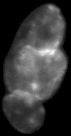

Checkbox(value=False, description='162.6.png')

180.4.png


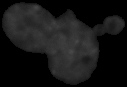

Checkbox(value=False, description='180.4.png')

46.3.png


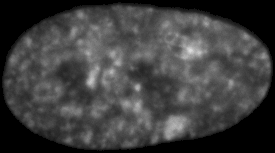

Checkbox(value=False, description='46.3.png')

118.1.png


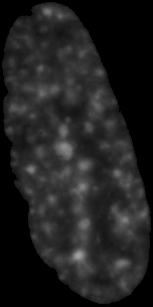

Checkbox(value=False, description='118.1.png')

45.6.png


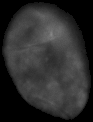

Checkbox(value=False, description='45.6.png')

154.4.png


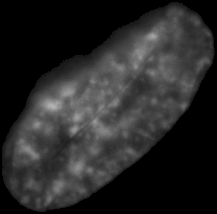

Checkbox(value=False, description='154.4.png')

109.2.png


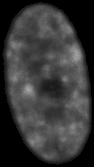

Checkbox(value=False, description='109.2.png')

47.7.png


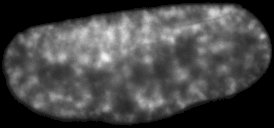

Checkbox(value=False, description='47.7.png')

169.1.png


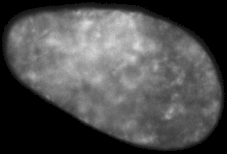

Checkbox(value=False, description='169.1.png')

101.3.png


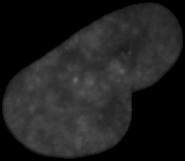

Checkbox(value=False, description='101.3.png')

148.3.png


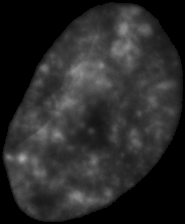

Checkbox(value=False, description='148.3.png')

168.3.png


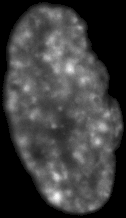

Checkbox(value=False, description='168.3.png')

184.6.png


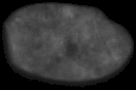

Checkbox(value=False, description='184.6.png')

119.2.png


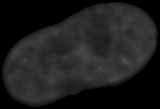

Checkbox(value=False, description='119.2.png')

94.1.png


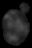

Checkbox(value=False, description='94.1.png')

88.3.png


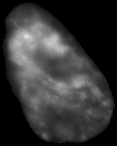

Checkbox(value=False, description='88.3.png')

55.3.png


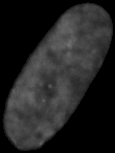

Checkbox(value=False, description='55.3.png')

193.4.png


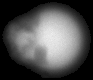

Checkbox(value=False, description='193.4.png')

98.7.png


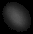

Checkbox(value=False, description='98.7.png')

109.1.png


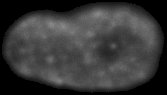

Checkbox(value=False, description='109.1.png')

5.3.png


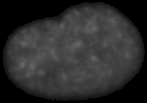

Checkbox(value=False, description='5.3.png')

98.1.png


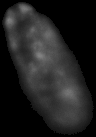

Checkbox(value=False, description='98.1.png')

54.1.png


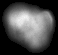

Checkbox(value=False, description='54.1.png')

49.2.png


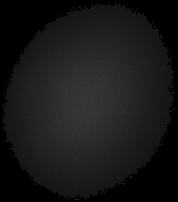

Checkbox(value=False, description='49.2.png')

211.3.png


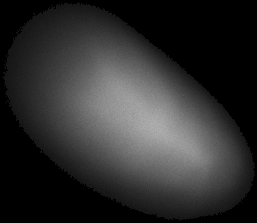

Checkbox(value=False, description='211.3.png')

214.1.png


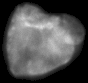

Checkbox(value=False, description='214.1.png')

214.2.png


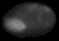

Checkbox(value=False, description='214.2.png')

223.3.png


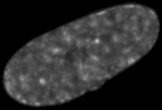

Checkbox(value=False, description='223.3.png')

229.1.png


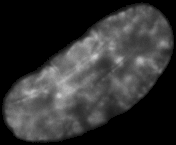

Checkbox(value=False, description='229.1.png')

229.2.png


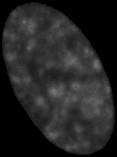

Checkbox(value=False, description='229.2.png')

231.8.png


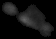

Checkbox(value=False, description='231.8.png')

231.10.png


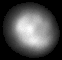

Checkbox(value=False, description='231.10.png')

235.1.png


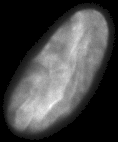

Checkbox(value=False, description='235.1.png')

236.2.png


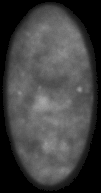

Checkbox(value=False, description='236.2.png')

248.1.png


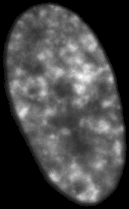

Checkbox(value=False, description='248.1.png')

250.2.png


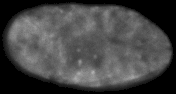

Checkbox(value=False, description='250.2.png')

251.2.png


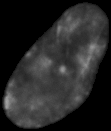

Checkbox(value=False, description='251.2.png')

253.6.png


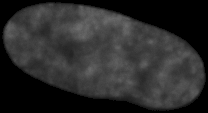

Checkbox(value=False, description='253.6.png')

253.8.png


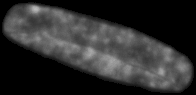

Checkbox(value=False, description='253.8.png')

253.9.png


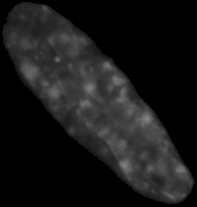

Checkbox(value=False, description='253.9.png')

254.4.png


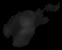

Checkbox(value=False, description='254.4.png')

255.2.png


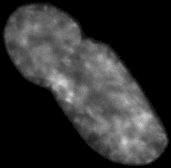

Checkbox(value=False, description='255.2.png')

256.1.png


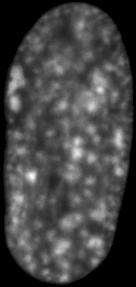

Checkbox(value=False, description='256.1.png')

261.3.png


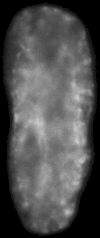

Checkbox(value=False, description='261.3.png')

262.1.png


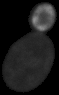

Checkbox(value=False, description='262.1.png')

262.2.png


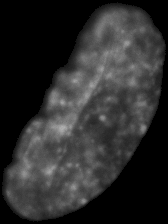

Checkbox(value=False, description='262.2.png')

263.2.png


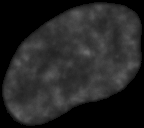

Checkbox(value=False, description='263.2.png')

264.2.png


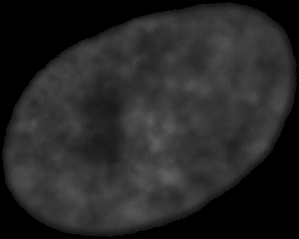

Checkbox(value=False, description='264.2.png')

273.3.png


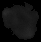

Checkbox(value=False, description='273.3.png')

274.1.png


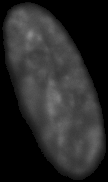

Checkbox(value=False, description='274.1.png')

275.8.png


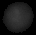

Checkbox(value=False, description='275.8.png')

277.10.png


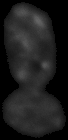

Checkbox(value=False, description='277.10.png')

279.1.png


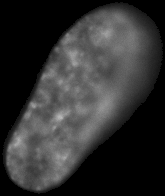

Checkbox(value=False, description='279.1.png')

280.1.png


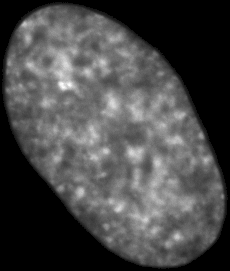

Checkbox(value=False, description='280.1.png')

281.2.png


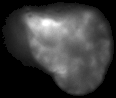

Checkbox(value=False, description='281.2.png')

290.2.png


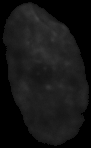

Checkbox(value=False, description='290.2.png')

294.2.png


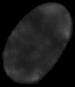

Checkbox(value=False, description='294.2.png')

295.4.png


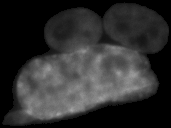

Checkbox(value=False, description='295.4.png')

302.1.png


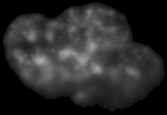

Checkbox(value=False, description='302.1.png')

306.4.png


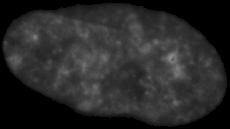

Checkbox(value=False, description='306.4.png')

307.5.png


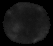

Checkbox(value=False, description='307.5.png')

312.5.png


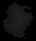

Checkbox(value=False, description='312.5.png')

320.3.png


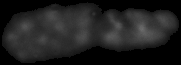

Checkbox(value=False, description='320.3.png')

327.2.png


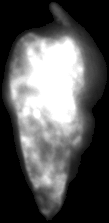

Checkbox(value=False, description='327.2.png')

329.1.png


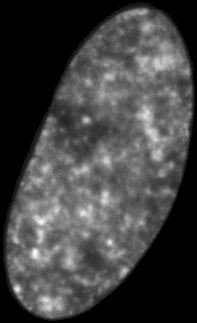

Checkbox(value=False, description='329.1.png')

332.1.png


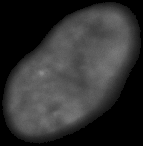

Checkbox(value=False, description='332.1.png')

339.1.png


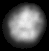

Checkbox(value=False, description='339.1.png')

339.3.png


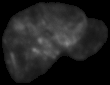

Checkbox(value=False, description='339.3.png')

342.1.png


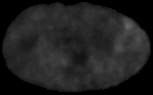

Checkbox(value=False, description='342.1.png')

344.1.png


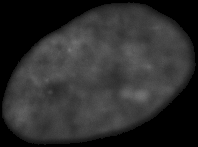

Checkbox(value=False, description='344.1.png')

344.4.png


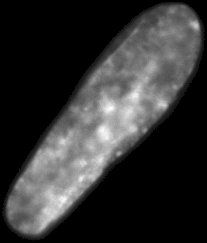

Checkbox(value=False, description='344.4.png')

347.6.png


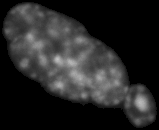

Checkbox(value=False, description='347.6.png')

352.1.png


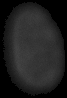

Checkbox(value=False, description='352.1.png')

354.2.png


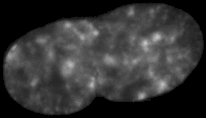

Checkbox(value=False, description='354.2.png')

359.1.png


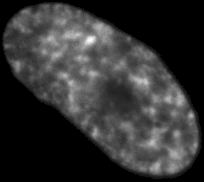

Checkbox(value=False, description='359.1.png')

365.2.png


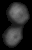

Checkbox(value=False, description='365.2.png')

366.4.png


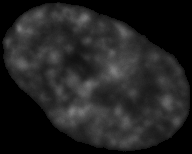

Checkbox(value=False, description='366.4.png')

370.5.png


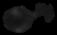

Checkbox(value=False, description='370.5.png')

381.7.png


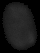

Checkbox(value=False, description='381.7.png')

383.3.png


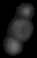

Checkbox(value=False, description='383.3.png')

392.1.png


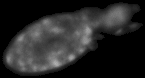

Checkbox(value=False, description='392.1.png')

403.3.png


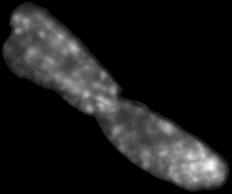

Checkbox(value=False, description='403.3.png')

403.6.png


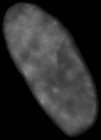

Checkbox(value=False, description='403.6.png')

409.2.png


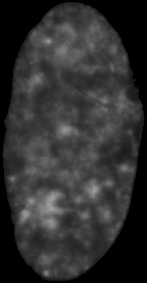

Checkbox(value=False, description='409.2.png')

410.1.png


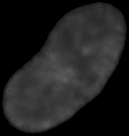

Checkbox(value=False, description='410.1.png')

416.4.png


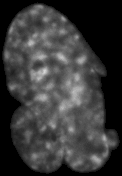

Checkbox(value=False, description='416.4.png')

418.3.png


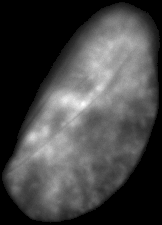

Checkbox(value=False, description='418.3.png')

.ipynb_checkpoints


IsADirectoryError: [Errno 21] Is a directory: 'tt10_data/wt_259_sen_dapi/.ipynb_checkpoints'

In [24]:
import os
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image

def interactive_image_review(image_dir):
    image_files = os.listdir(image_dir)
    
    # Create a dict to hold image checkboxes
    checkboxes = {img: widgets.Checkbox(description=img, value=False) for img in image_files}
    button_delete = widgets.Button(description="Delete Selected Images")
    
    # Display images and checkboxes
    for img, checkbox in checkboxes.items():
        print(img)
        display(Image.open(os.path.join(image_dir, img)))
        display(checkbox)
    
    # Button click handler
    def on_button_delete_clicked(b):
        # Go through all checkboxes
        for img, checkbox in checkboxes.items():
            # If checkbox is checked
            if checkbox.value:
                # Delete the image
                os.remove(os.path.join(image_dir, img))
                # Uncheck the checkbox
                checkbox.value = False
        clear_output()
        print("Deleted selected images.")
    
    button_delete.on_click(on_button_delete_clicked)
    
    # Display delete button
    display(button_delete)

interactive_image_review('tt10_data/wt_259_sen_dapi')


Displaying  20  images out of  1003  in  tt10_data/wt_259_sen_dapi


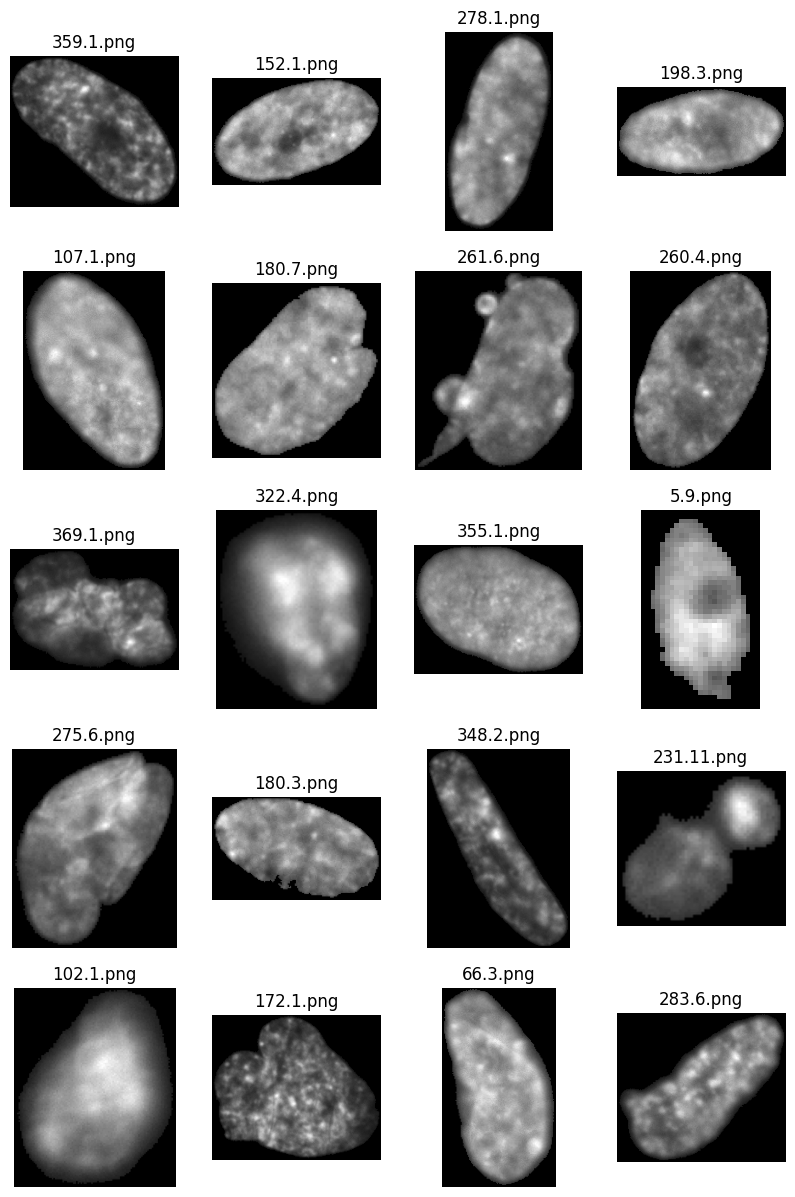

In [21]:
# Visualize random n number of cell images in any dir (.png only)

image_list = show_n_random_images('tt10_data/wt_259_sen_dapi', 20, 4)

Displaying  30  images in  masked_sc/wt_259_ab_pro


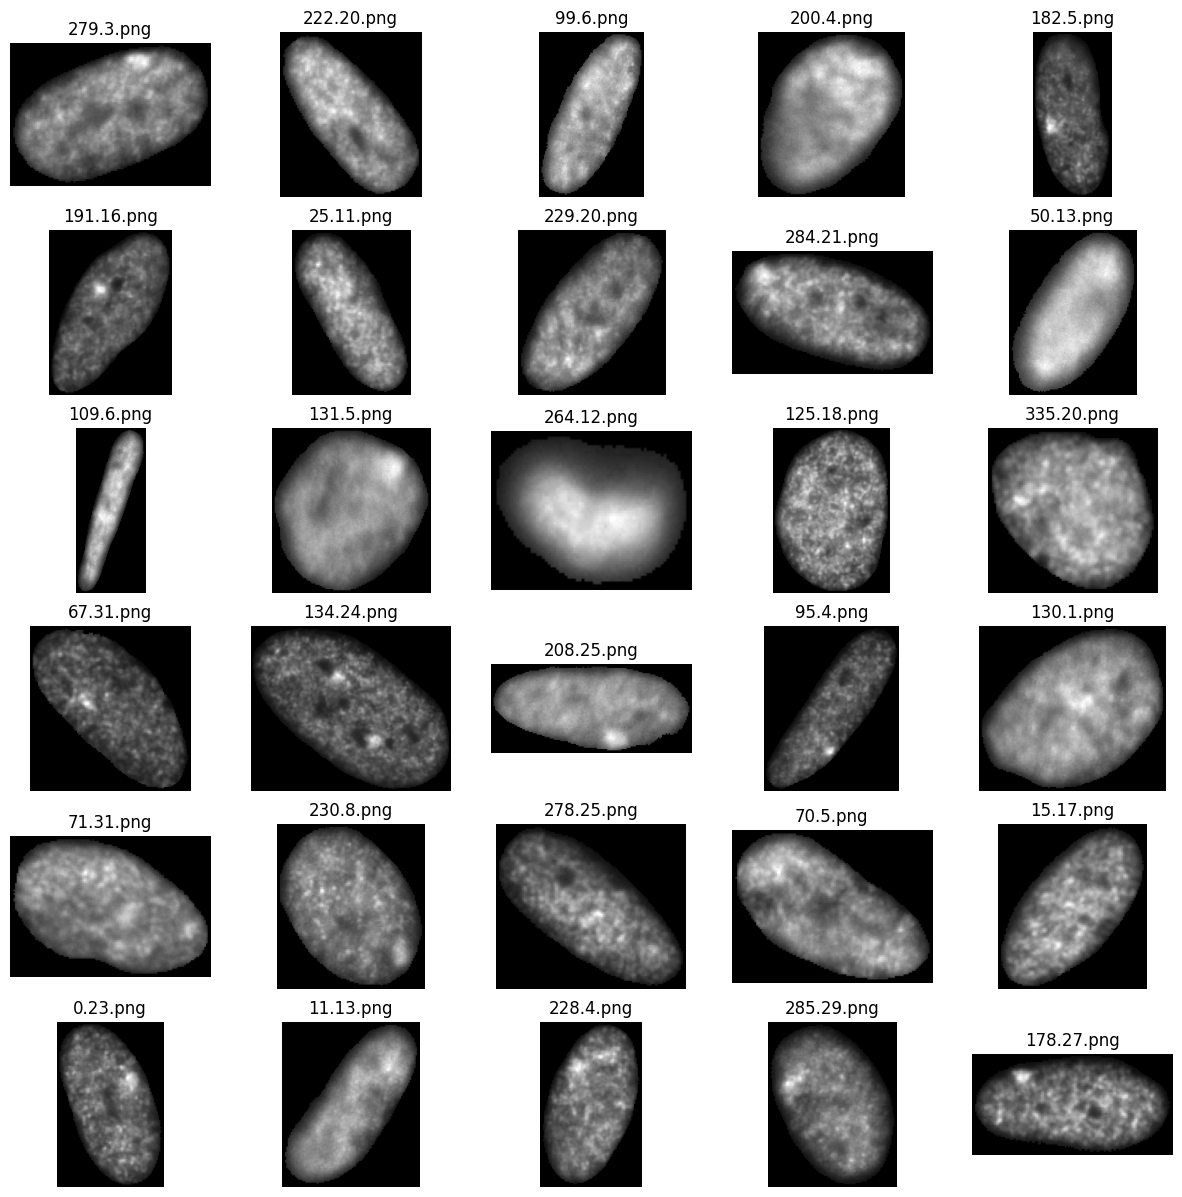

In [6]:
# Visualize list of cells from dir - useful for looking at same cells in different channels 

show_images('masked_sc/wt_259_ab_pro', image_list)

In [26]:
#sorts into train and test data from one label up to a given maximum number of training data

make_train_test_data('train7.6', 'test7.6', 'masked_sc/emp_60_dapi_pro', 800)
make_train_test_data('train7.6', 'test7.6', 'masked_sc/wt_60_dapi_pro', 800)
make_train_test_data('train7.6', 'test7.6', 'masked_sc/r80c_60_dapi_pro', 800)

done
done
done


In [14]:
make_train_test_data('train9', 'test9', 'sc_data/wt_259_dapi_sen_mod', 500)


done


In [ ]:

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle("Images with Median Intensity >= {}".format(threshold))
    for i, ax in enumerate(axes.flat):
        if i < len(random_high_intensity_images):
            ax.imshow(random_high_intensity_images[i][0], cmap='gray')
        ax.axis('off')
    plt.show()
    print(len(high_intensity_images))
    print(len(low_intensity_images))


In [24]:
mean, std = calculate_mean_and_std('train8')
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor([0.2098, 0.2098, 0.2098])
Standard Deviation: tensor([0.1576, 0.1576, 0.1576])


Models !!!

In [12]:
# model 0.1

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(100352, 4608)
        self.fc2 = nn.Linear(4608, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = nn.functional.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x100352 and 4608x4608) corrected

In [38]:
#model 0.2
#validated model from CIFAR10
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=25088, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv1(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv2(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv3(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv4(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv5(x), negative_slope=0.1)
        x = self.dropout(x)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        #x = nn.functional.softmax(self.fc3(x))
        x = self.fc3(x)
        return x

In [28]:
# model 0.2.1
# should be a bit faster
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(in_features=100352, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=4)

    def forward(self, x):
        x = self.pool(nn.functional.leaky_relu(self.bn1(self.conv1(x)), negative_slope=0.1))
        x = self.pool(nn.functional.leaky_relu(self.bn2(self.conv2(x)), negative_slope=0.1))
        x = self.pool(nn.functional.leaky_relu(self.bn3(self.conv3(x)), negative_slope=0.1))
        x = self.pool(nn.functional.leaky_relu(self.bn4(self.conv4(x)), negative_slope=0.1))
        x = x.view(x.size(0), -1)
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [23]:
# model 0.3
#a simplified version of the above model, from 5 conv layers to 1, no dropout, 3 to 2 fc layers
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(in_features=200704, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv1(x), negative_slope=0.1)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x200704 and 4096x128)

In [29]:
# Instantiate the CNN model and move it to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleModel().to(device)

Resnet50

In [41]:
#alternative model 
model = models.resnet50(weights=True)

/home/zchua/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# OPTIONAL = freeze all layers (optional, but useful for fine-tuning)

for param in resnet50.parameters():
    param.requires_grad = False

In [34]:
# Replace the last fully connected layer with a new one for your specific task

num_classes = 4  # Replace this with the number of classes in the classification task
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
# OPTIONAL Unfreeze the last few layers if needed (optional)
for param in resnet50.layer4.parameters():
    param.requires_grad = True
for param in resnet50.fc.parameters():
    param.requires_grad = True

In [35]:
train_loader, test_loader = transform_load_data('train5', 'test5', 32, 224, 224, 0.2, 0.16)

In [24]:
#alternative criterion / optimizer definition for imbalanced datasets

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=True, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        if self.reduce:
            return torch.mean(focal_loss)
        else:
            return focal_loss

criterion = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
train_model(model, train_loader, test_loader, optimizer, criterion, 30, 'resnet50_tt5_v1.pt')

Begin model training for 30 epochs
Training loss for Epoch 1 is 1.4158 and Training accuracy is 0.28
Validation loss for Epoch 1 is 1.3776 and Validation accuracy is 0.24
Completed Epoch 1 in 351.7 seconds
Temp model saved at Epoch 1 with validation lost of 1.3776


KeyboardInterrupt: 

In [33]:
# load model
#model = SimpleModel()

#alternative model 
model = models.resnet50(weights=True)

# load the saved state dict
model.load_state_dict(torch.load('resnet50_trained.pt'))

# set the model in evaluation mode
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
#checkihg test data one more time
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 52 %


In [2]:
# outputs confusion matrix and accuracy of final model

import torch
import numpy as np
from sklearn.metrics import confusion_matrix

correct = 0
total = 0
label_names = ['H3K56ac', 'H3K4me1', 'H3K27ac', 'H3K27ac(2)', 'H3K27me3', 'DAPI']

# Evaluate the model on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true += labels.tolist()
        y_pred += preds.tolist()
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Generate a confusion matrix
labels = list(range(6))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Print the confusion matrix
print(cm)


NameError: name 'models' is not defined

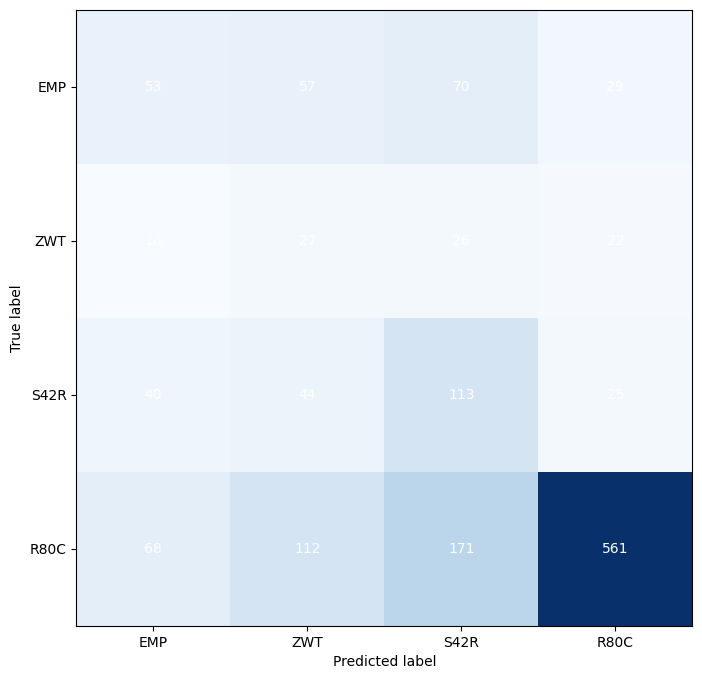

In [40]:
# Plots the confusion matrix with labels

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(len(label_names)))
ax.set_yticks(np.arange(len(label_names)))
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
for i in range(len(label_names)):
    for j in range(len(label_names)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# extracts intermediate layers of neural network for visualization'
class CustomResNet50(nn.Module):
    def __init__(self, original_model):
        super(CustomResNet50, self).__init__()
        self.features = nn.Sequential(*list(original_model.children())[:-2])

    def forward(self, x):
        x = self.features(x)
        return x

custom_resnet50 = CustomResNet50(resnet50)
custom_resnet50.eval()


In [ ]:
input_image = Image.open('path/to/your/image.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    custom_resnet50.cuda()
    input_batch = input_batch.to('cuda')

with torch.no_grad():
    features = custom_resnet50(input_batch)


In [74]:
#training data dimensions
for images, labels in train_loader:
    print(images.size())
    
print(len(train_loader.dataset))

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size

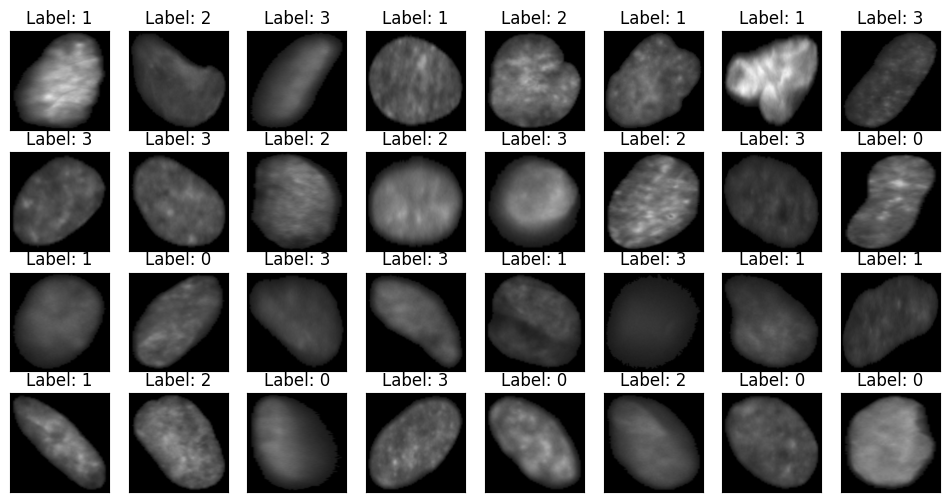

In [85]:
#shows training data images after dimensional scaling for one batch
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the train_loader
images, labels = next(iter(train_loader))

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.set_title(f'Label: {labels[i].item()}')

plt.show()

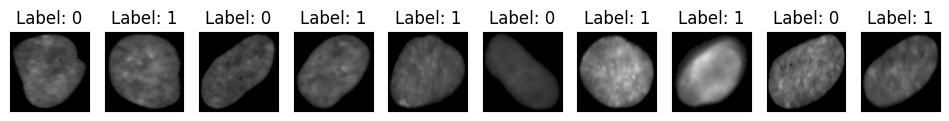

In [78]:
show_images_from_loader(train_loader, labels=[0, 1], num_batches=1, batch_size=10)


In [ ]:
def plot_median_intensity_histogram(directory, threshold, binsize, title):
    median_intensities = []

    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Remove intensity values less than the threshold
            img = img[img >= threshold]
            
            median_intensity = np.median(img)
            median_intensities.append(median_intensity)

    plt.hist(median_intensities, bins=binsize)
    plt.title(title)
    plt.xlabel("Median Intensity")
    plt.ylabel("Frequency")
    plt.axvline(x=70, color='black', linestyle='--')  # Add a vertical line at x=70
    plt.show()
   

#plot cell intensities (median)
directory = "masked_sc/emp_110_dapi_pro"
title = "Median intensity of H3K27ac stained nuclei"
plot_median_intensity_histogram(directory, 3, 'auto', title)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil

def display_images_by_intensity(directory, threshold=70, max_images=9):
    low_intensity_images = []
    high_intensity_images = []

    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img2 = img[img >= 3]
            median_intensity = np.median(img2)
            if median_intensity < threshold:
                low_intensity_images.append((img, img_path))
            else:
                high_intensity_images.append((img, img_path))

    # Create folders to save the images
    low_intensity_folder = os.path.join(directory, "tt8_data/low_int")
    high_intensity_folder = os.path.join(directory, "tt8_data/high_int")
    os.makedirs(low_intensity_folder, exist_ok=True)
    os.makedirs(high_intensity_folder, exist_ok=True)

    # Save images to respective folders
    for _, img_path in low_intensity_images:
        shutil.copy(img_path, low_intensity_folder)

    for _, img_path in high_intensity_images:
        shutil.copy(img_path, high_intensity_folder)

    # Display random images
    random_low_intensity_images = random.sample(low_intensity_images, min(max_images, len(low_intensity_images)))
    random_high_intensity_images = random.sample(high_intensity_images, min(max_images, len(high_intensity_images)))

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle("Images with Median Intensity < {}".format(threshold))
    for i, ax in enumerate(axes.flat):
        if i < len(random_low_intensity_images):
            ax.imshow(random_low_intensity_images[i][0], cmap='gray')
        ax.axis('off')
    plt.show()

# Usage example:
directory = "masked_sc/emp_110_ab_pro"
display_images_by_intensity(directory)


In [ ]:
#sorts DAPI images to those of low or high intensity k27ac

directory = "masked_sc/emp_110_ab_pro"
low_intensity_images = []
high_intensity_images = []
threshold=70

for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img2 = img[img >= 3]
        median_intensity = np.median(img2)
        if median_intensity < threshold:
            low_intensity_images.append(img_path)
        else:
            high_intensity_images.append(img_path)
            
new_image_paths_low = [path.replace('ab_pro', 'dapi_pro') for path in low_intensity_images]
new_image_paths_high = [path.replace('ab_pro', 'dapi_pro') for path in high_intensity_images]
new_folder_low = 'tt8_data/lowab_dapi'
new_folder_high = 'tt8_data/highab_dapi'

# Create the new folder if it doesn't exist
if not os.path.exists(new_folder_low):
    os.makedirs(new_folder_low)
if not os.path.exists(new_folder_high):
    os.makedirs(new_folder_high)

# Loop through the image paths and copy the images to the new folder
for path in new_image_paths_low:
    # Construct the new path
    new_path = os.path.join(new_folder_low, os.path.basename(path))
    # Copy the image
    shutil.copy(path, new_path)
for path in new_image_paths_high:
    # Construct the new path
    new_path = os.path.join(new_folder_high, os.path.basename(path))
    # Copy the image
    shutil.copy(path, new_path)

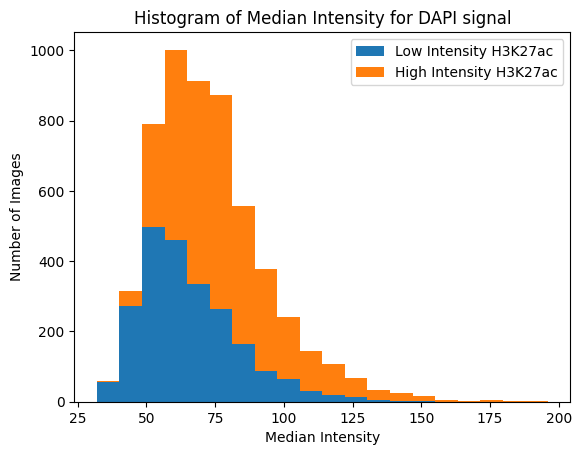

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the directories containing the images
dir1 = 'tt8_data/lowab_dapi'
dir2 = 'tt8_data/highab_dapi'

# Define a function to calculate the median intensity of an image
def get_median_intensity(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img2 = img[img >= 3]
    median_intensity = np.median(img2)
    return median_intensity

# Get the median intensity values for each directory
dir1_medians = [get_median_intensity(os.path.join(dir1, f)) for f in os.listdir(dir1) if f.endswith('.png')]
dir2_medians = [get_median_intensity(os.path.join(dir2, f)) for f in os.listdir(dir2) if f.endswith('.png')]

# Create a stacked histogram of the median intensity values
plt.hist([dir1_medians, dir2_medians], bins=20, stacked=True, label=['Low Intensity H3K27ac', 'High Intensity H3K27ac'])
plt.xlabel('Median Intensity')
plt.ylabel('Number of Images')
plt.title('Histogram of Median Intensity for DAPI signal')
plt.legend()
plt.show()


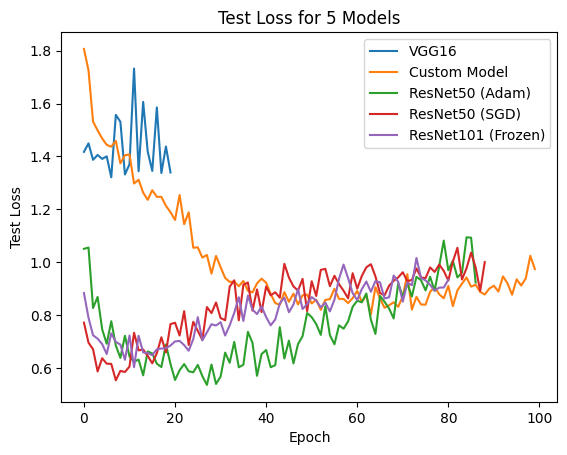

In [37]:
# List of CSV file paths
csv_files = ['tt5_model_v4.csv', 'tt5_model_v5.csv', 'tt5_model_v1.csv', 'tt5_model_v2.csv', 'tt5_model_v3.csv']
line_labels = ['VGG16', 'Custom Model', 'ResNet50 (Adam)', 'ResNet50 (SGD)', 'ResNet101 (Frozen)']

# Read and plot the test loss columns
for i, csv_file in enumerate(csv_files, start=1):
    df = pd.read_csv(csv_file)
    plt.plot(df['Test Loss'], label=line_labels[i-1])

# Configure the plot
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.title('Test Loss for 5 Models')
plt.legend()

# Show the plot
plt.show()


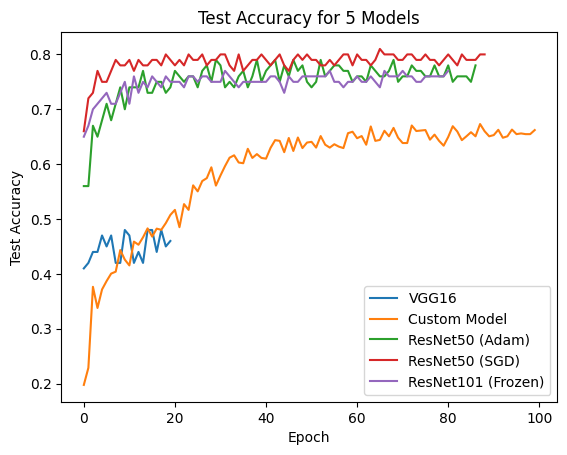

In [41]:
# List of CSV file paths
csv_files = ['tt5_model_v4.csv', 'tt5_model_v5.csv', 'tt5_model_v1.csv', 'tt5_model_v2.csv', 'tt5_model_v3.csv']
line_labels = ['VGG16', 'Custom Model', 'ResNet50 (Adam)', 'ResNet50 (SGD)', 'ResNet101 (Frozen)']

# Read and plot the test loss columns
for i, csv_file in enumerate(csv_files, start=1):
    df = pd.read_csv(csv_file)
    plt.plot(df['Test Accuracy'], label=line_labels[i-1])

# Configure the plot
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for 5 Models')
plt.legend()

# Show the plot
plt.show()


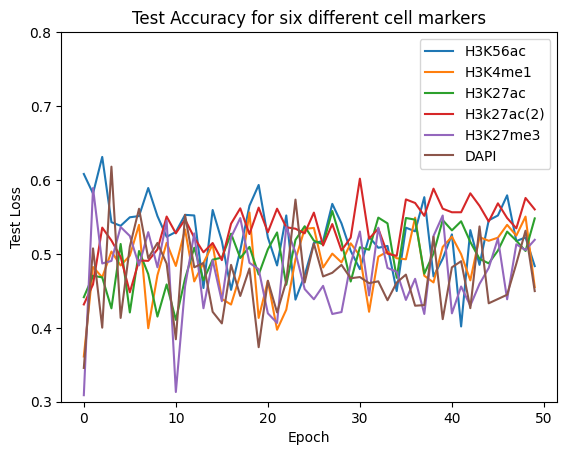

In [49]:
# List of CSV file paths
csv_files = ['tt7.1_model.csv', 'tt7.2_model.csv', 'tt7.3_model.csv', 'tt7.4_model.csv', 'tt7.5_model.csv', 'tt7.6_model.csv']
line_labels = ['H3K56ac', 'H3K4me1', 'H3K27ac', 'H3k27ac(2)', 'H3K27me3', 'DAPI']

# Read and plot the test loss columns
for i, csv_file in enumerate(csv_files, start=1):
    df = pd.read_csv(csv_file)
    plt.plot(df['Test Accuracy'], label=line_labels[i-1])

# Configure the plot
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.title('Test Accuracy for six different cell markers')
plt.legend()
plt.ylim(0.3, 0.8) # Set the y-axis limits


# Show the plot
plt.show()


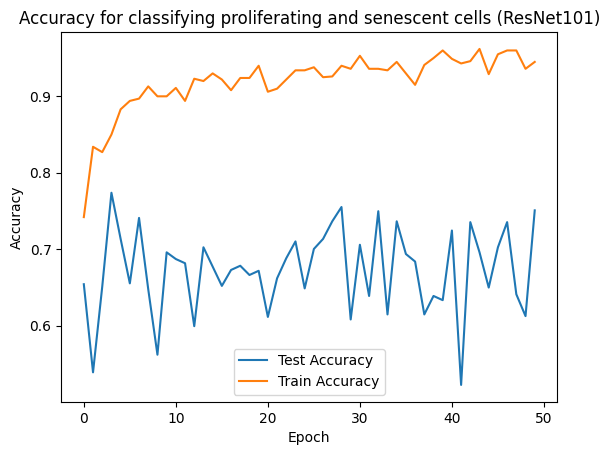

In [19]:
# List of CSV file paths
csv_file = 'tt9_model.csv'

# Read and plot the test loss columns

df = pd.read_csv(csv_file)
plt.plot(df['Test Accuracy'], label='Test Accuracy')
plt.plot(df['Train Accuracy'], label='Train Accuracy')
# Configure the plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for classifying proliferating and senescent cells (ResNet101)')
plt.legend()

# Show the plot
plt.show()


In [43]:
#model architecture and stats
from torchsummary import summary
model = models.resnet50(weights=True)
#model = SimpleModel()
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [33]:
class CombinedChannelsDataset(Dataset):
    def __init__(self, dir1, dir2, filenames, transform=None):
        self.dir1 = dir1
        self.dir2 = dir2
        self.filenames = filenames
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name1 = os.path.join(self.dir1, self.filenames[idx])
        img_name2 = os.path.join(self.dir2, self.filenames[idx])

        img1 = Image.open(img_name1)
        img2 = Image.open(img_name2)

        combined_img = Image.merge('LA', (img1, img2))

        if self.transform:
            combined_img = self.transform(combined_img)

        return combined_img

# Directories containing the images
dir1 = "masked_sc/emp_72_ab_pro"
dir2 = "masked_sc/emp_72_dapi_pro"

# Assuming that the filenames are the same in both directories
filenames = [f for f in os.listdir(dir1) if f.endswith('.png')]

# Splitting the filenames into train and test sets
train_filenames, test_filenames = train_test_split(filenames, test_size=0.1, random_state=42)

# Creating train and test datasets
train_dataset = CombinedChannelsDataset(dir1, dir2, train_filenames, transform=ToTensor())
test_dataset = CombinedChannelsDataset(dir1, dir2, test_filenames, transform=ToTensor())

# Creating train and test dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)


In [32]:
np.median(train_dataset[50][0])

0.13333334

In [5]:
model = models.resnet101(weights=False)
# Replace the last fully connected layer with a new one for your specific task

num_classes = 3  # Replace this with the number of classes in the classification task
num_features = model.fc.in_features

# Define additional layers
additional_layers = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)

model.fc = additional_layers

# load the saved state dict
model.load_state_dict(torch.load('tt6.3v5.pt'))

# set the model in evaluation mode
model.eval()

/home/zchua/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#train_loader, test_loader = transform_load_data('train6.3', 'test6.3', 32, 224, 224, 0.1467, 0.1246) H3K27ac
#train_loader, test_loader = transform_load_data('train6.1', 'test6.1', 32, 224, 224, 0.2, 0.16) #H3K56ac
#train_loader, test_loader = transform_load_data('train6.2', 'test6.2', 32, 224, 224, 0.2, 0.16) #H3K4me1
#train_loader, test_loader = transform_load_data('train6.4', 'test6.4', 32, 224, 224, 0.2, 0.16) #H3K27ac
train_loader, test_loader = transform_load_data('train6.5', 'test6.5', 32, 224, 224, 0.2, 0.16) #DAPI

cm = eval_model(model, device, test_loader, 3)

Accuracy of the network on the test images: 48 %
[[179 190 185]
 [ 73 130 111]
 [246 261 694]]
Sum by row: OrderedDict([('True Label 0', 554), ('True Label 1', 314), ('True Label 2', 1201)])


In [38]:
def simple_plot_confusion_matrix(cm, classes):
    # Output the sum of each row as a list and print it
    sum_by_row = cm.sum(axis=1).tolist()
    print("Sum by row:", sum_by_row)
    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' # 2 decimal places
    thresh = cm_norm.max() / 2.5
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            plt.text(j, i, format(cm_norm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm_norm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Sample usage:
# cm = np.array([[10, 5], [3, 15]])
# simple_plot_confusion_matrix(cm, ["Class 1", "Class 2"])


Sum by row: [554, 314, 1201]


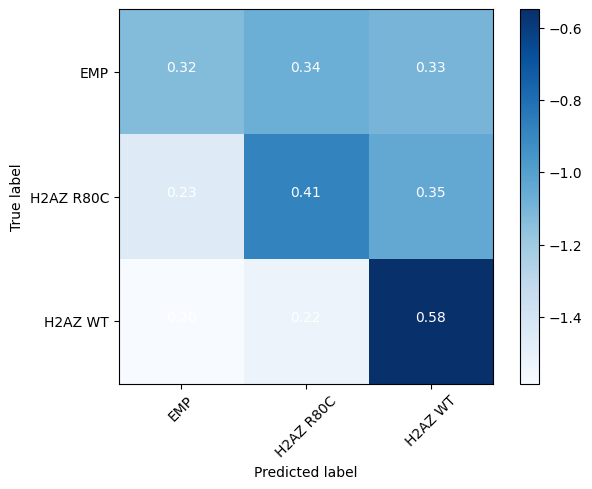

In [22]:
#classes = ['H3K27ac', 'H3K27me3', 'H3K56ac', 'DAPI', 'H3K4me1', 'H3K27ac(2)']
import seaborn as sns
classes = ['EMP', 'H2AZ R80C', 'H2AZ WT']
simple_plot_confusion_matrix(cm, classes)
#plot_confusion_matrix(cm, classes)

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=True)

# load the saved state dict
num_classes = 3  # Replace this with the number of classes in the classification task
model.fc = nn.Linear(model.fc.in_features, num_classes)

model.load_state_dict(torch.load('tt7.3_model.pt'))

# set the model in evaluation mode
model.eval()

train_loader, test_loader = transform_load_data('train7.3', 'test7.3', 32, 224, 224, 0.2, 0.16) #H3K27me3

cm = eval_model(model, device, test_loader, 3)

/home/zchua/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy of the network on the test images: 55 %
[[192 162 159]
 [ 26 176  20]
 [221 216 620]]
Sum by row: OrderedDict([('True Label 0', 513), ('True Label 1', 222), ('True Label 2', 1057)])


Sum by row: [513, 222, 1057]


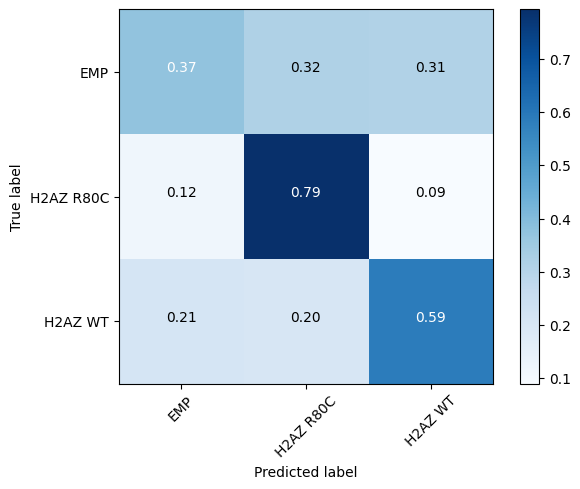

In [45]:
classes = ['EMP', 'H2AZ R80C', 'H2AZ WT']
simple_plot_confusion_matrix(cm, classes)